In [1]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
from covid_tracking_data.collector import *
from covid_analysis.utility import *
from covid_analysis.models import *
from ourworldindata_org.collector import get_dataset_df_from_file as get_world_dataset_df_from_file

In [3]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

### Fetch the latest data

If the interface is overloaded, the collector will retry every few seconds.

In [4]:
df, states_in_order = get_dataset_df()
fns = save_data(df, states_in_order)
print("data saved to {} and {}".format(*fns))

           positive       negative       pending  hospitalized        death  \
count   1423.000000    1284.000000    440.000000    310.000000   746.000000   
mean     741.128602    4361.626947   1099.284091    411.990323    23.257373   
std     4099.814506   10765.300074   7466.967602   1628.611819    93.491604   
min        0.000000       0.000000     -3.000000      0.000000     0.000000   
25%        6.000000      93.000000      4.000000     17.000000     1.000000   
50%       50.000000     556.000000     20.000000     61.500000     3.000000   
75%      288.000000    3650.750000     92.500000    195.750000    13.000000   
max    75795.000000  129391.000000  64400.000000  15904.000000  1550.000000   

               total  totalTestResults  deathIncrease  hospitalizedIncrease  \
count    1429.000000       1429.000000    1373.000000           1373.000000   
mean     4995.549335       4657.071379       2.729060             19.466133   
std     14916.363902      13905.727509      16.0838

### Fetch data set from local disk

In [5]:
!ls ~/data/
# gets thte latest file names
recent = ! ls -drt ~/data/* | tail -n 2
print("Latest files are:\n\t{}\n\t{}".format(*recent))

2020-04-01_0039_state_daily_data.csv 2020-04-01_1652_state_daily_data.csv
2020-04-01_0039_state_rank.csv       2020-04-01_1652_state_rank.csv
2020-04-01_1601_state_daily_data.csv 2020-04-01_1654_state_daily_data.csv
2020-04-01_1601_state_rank.csv       2020-04-01_1654_state_rank.csv
2020-04-01_1649_state_daily_data.csv 2020-04-01_1658_state_daily_data.csv
2020-04-01_1649_state_rank.csv       2020-04-01_1658_state_rank.csv
Latest files are:
	/Users/drskippy/data/2020-04-01_1658_state_daily_data.csv
	/Users/drskippy/data/2020-04-01_1658_state_rank.csv


In [6]:
df, states_in_order = get_dataset_df_from_file(recent)
df.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,order,lastUpdateEt
0,2020-03-04,NY,6.0,48.0,24.0,NaN,NaN,78,1afd6e025157a38728847bbf42145c63b024c387,2020-03-04 21:00:00+00:00,54,36,NaN,NaN,NaN,NaN,NaN,0,2020-03-29 09:16:00
1,2020-03-05,NY,22.0,76.0,24.0,NaN,NaN,122,25c15099a4116ff026c04c0b4a6b3780ccba310b,2020-03-05 21:00:00+00:00,98,36,0.0,0.0,28.0,16.0,44.0,0,2020-03-29 09:16:00
2,2020-03-06,NY,33.0,92.0,236.0,NaN,NaN,361,1bd1fecfd3d23311c604ac6c27d05ce5835af2c5,2020-03-06 21:00:00+00:00,125,36,0.0,0.0,16.0,11.0,27.0,0,2020-03-29 09:16:00
3,2020-03-07,NY,76.0,92.0,236.0,NaN,NaN,404,d9b32dfe41c22decc86fe0a35515525a18b68fa9,2020-03-07 21:00:00+00:00,168,36,0.0,0.0,0.0,43.0,43.0,0,2020-03-29 09:16:00
4,2020-03-08,NY,105.0,92.0,NaN,NaN,NaN,197,22912a8c6cdefd796b1412292c796959a8cc088f,2020-03-08 20:00:00+00:00,197,36,0.0,0.0,0.0,29.0,29.0,0,2020-03-29 09:16:00


In [7]:
dfus, _ = get_state_df(df, "*")
dfus["sum_of_tests"] = dfus["positive"] + dfus["negative"] + dfus["pending"]
dfus.tail()

,date,positive,negative,pending,totalTestResults,death,lastUpdateEt,daily_new_positive,sum_of_tests
23,2020-03-27,99413.0,527220.0,60094.0,626633,1530.0,2020-04-01 10:00:00,18678.0,686727.0
24,2020-03-28,118234.0,617470.0,65712.0,735704,1965.0,2020-04-01 10:00:00,18821.0,801416.0
25,2020-03-29,139061.0,692290.0,65549.0,831351,2428.0,2020-04-01 10:00:00,20827.0,896900.0
26,2020-03-30,160530.0,784324.0,65382.0,944854,2939.0,2020-04-01 10:00:00,21469.0,1010236.0
27,2020-03-31,184770.0,864201.0,59529.0,1048971,3746.0,2020-04-01 10:00:00,24240.0,1108500.0


### Zero-day normalized log plots

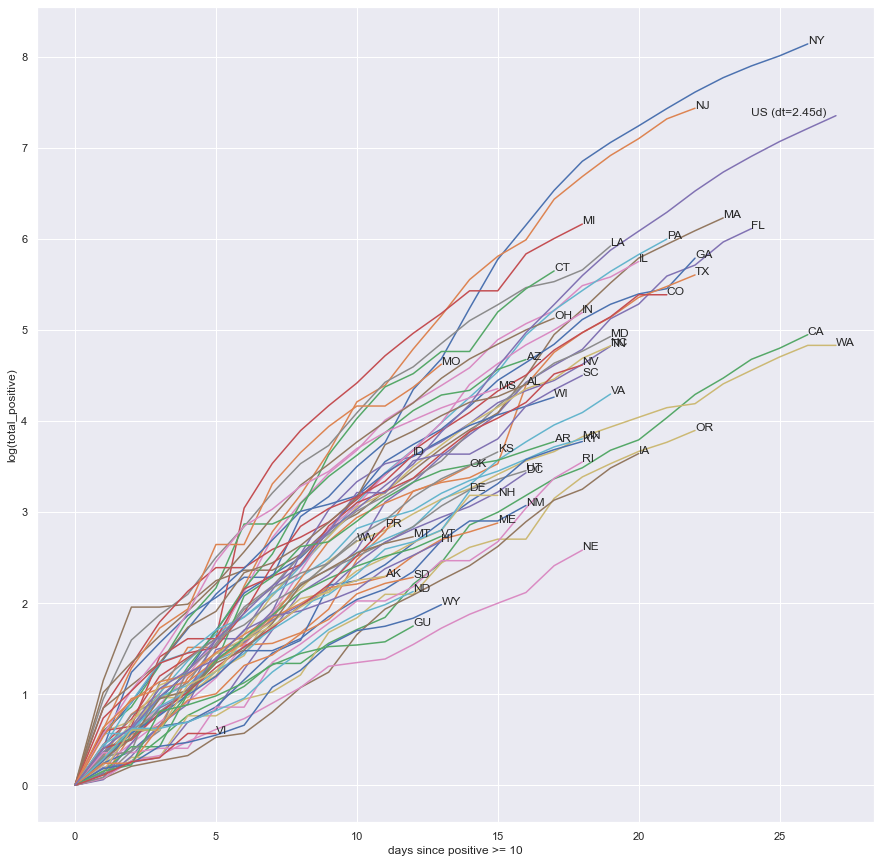

In [8]:
# start after day with min_pos or more cases
min_pos = 10
last_n_days = None

# image
plt.figure(figsize=[15,15])

key_value = "days_since_{}".format(min_pos)

# state by state
for s in states_in_order:
    try:
        dfq, dt, lud = get_state_doubling_df(df, s, zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
        plt.plot(dfq[key_value].values, dfq.log_positive.values)
        plt.annotate(s, (dfq[key_value].values[-1], dfq.log_positive.values[-1]))
    except IndexError:
        pass

# All US image
try:
    dfq, dt, lud = get_state_doubling_df(df, "*", zero_aligned=True, min_pos=min_pos, use_last_n_days=last_n_days)
    plt.plot(dfq[key_value].values, dfq.log_positive.values)
    xus = int(.9* dfq[key_value].values[-1])
    plt.annotate("US (dt={:1.2f}d)".format(dt), (xus , dfq.log_positive.values[-1]))
except IndexError:
    pass

plt.xlabel("days since positive >= {}".format(min_pos))
plt.ylabel("log(total_positive)")
plt.show()

### US Totals and Doubling Times

US Total Positive, doubling every 3.56 days
  as of 2020-04-01T10:00
  based on last 10 days of data


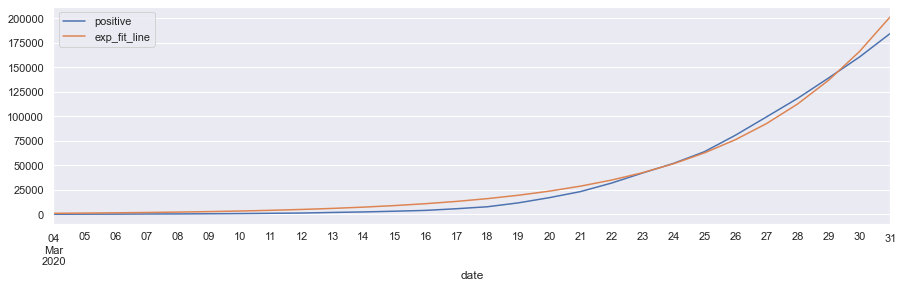

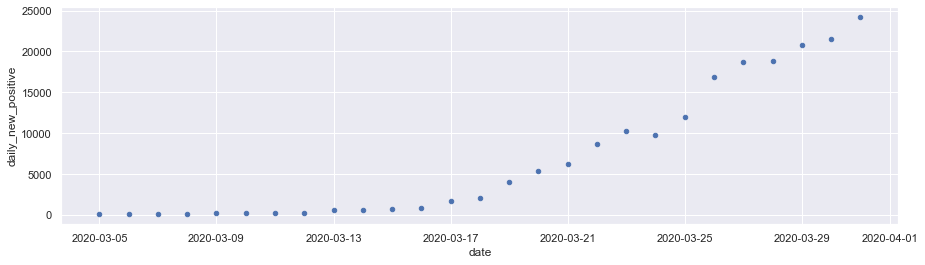

In [9]:
last_n_days = 10
dfa, dt, lud = get_state_doubling_df(df, "*", use_last_n_days=last_n_days)
lu = str(lud)[:16]
print("US Total Positive, doubling every {:.3} days\n  as of {}".format(dt, lu))
print("  based on last {} days of data".format(last_n_days))
dfa.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
dfa.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
plt.show()

### Testing

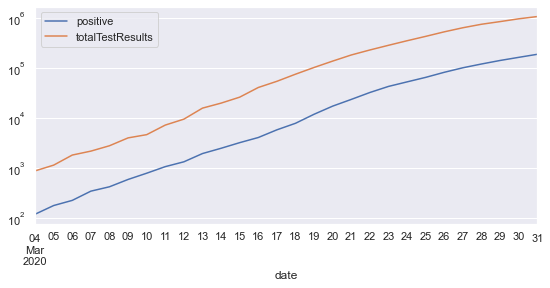

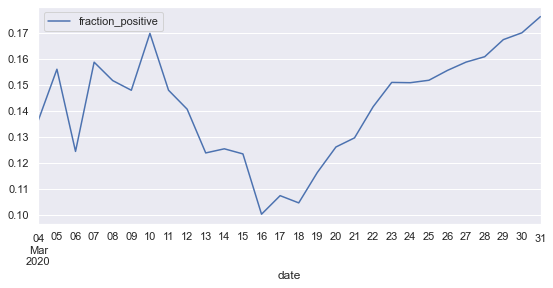

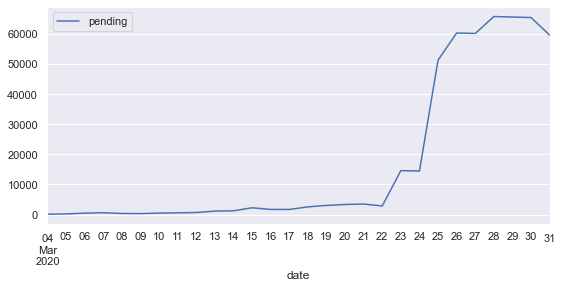

In [10]:
dfus["fraction_positive"] = dfus["positive"]/ dfus["totalTestResults"]
ax = dfus.plot(x="date", y="positive", logy=True, figsize=[9,4])
dfus.plot("date", "totalTestResults", logy=True, ax=ax)
dfus.plot("date", "fraction_positive", figsize=[9,4])
dfus.plot("date", "pending", figsize=[9,4])

### Current measured ratios and percentages

These are based on cases that test postive and test negative (state labs policies vary on this).

In [11]:
print("Current strategies for diagnosis give pos/neg tests ratio of {:.1%}".format(
    dfus.positive.values[-1]/(dfus.totalTestResults.values[-1])))
print("on total tests tracked = {:,}".format(int(dfus.totalTestResults.values[-1])))

Current strategies for diagnosis give pos/neg tests ratio of 17.6%
on total tests tracked = 1,048,971


In [12]:
pos_dr = dfus.death.values[-1]/dfus.positive.values[-1]
print("Current death/positive ratio of {:.1%}".format(pos_dr))

Current death/positive ratio of 2.0%


In [13]:
projections(dfus, dt, pos_dr)
projections(dfus, 2*dt, pos_dr)


US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 3.56 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-03-31 00 h,    184,770 [total deaths  3,745] Death Rate Avg = 1,008 per wk
   1: 2020-04-03 13 h,    369,540 [total deaths  7,491] Death Rate Avg = 1,774 per wk
   2: 2020-04-07 02 h,    739,080 [total deaths 14,983] Death Rate Avg = 3,167 per wk
   3: 2020-04-10 16 h,  1,478,160 [total deaths 29,967] Death Rate Avg = 5,720 per wk

US flu death rate average per week = 61,099/52 ≈ 1,174
Using doubling time of 7.11 days
period      date         positive,     deaths              weekly rate
-------------------------------------------------------------------------------------
   0: 2020-03-31 00 h,    184,770 [total deaths  3,745] Death Rate Avg = 1,008 per wk
   1: 2020-04-07 02 h,    369,540 [total deaths  7,491] Death Rate Avg = 1,583

### State Trends and Doubling Periods

State=NY  (last_update=2020-03-29T09:16)
Doubling every 4.0 days based on last 10 days of data
(naive estimates: current_unresolved=65439 hosp=9815 icu=2617)


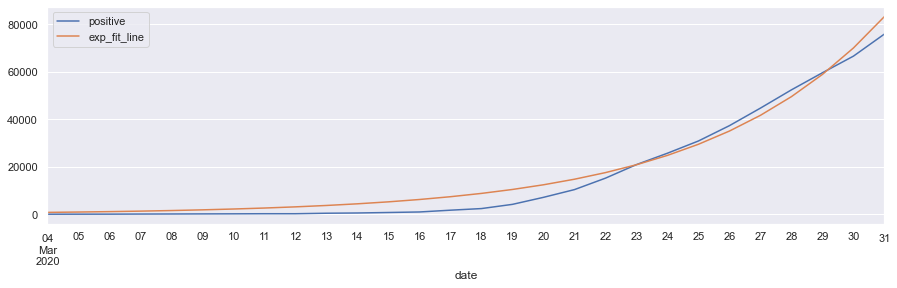

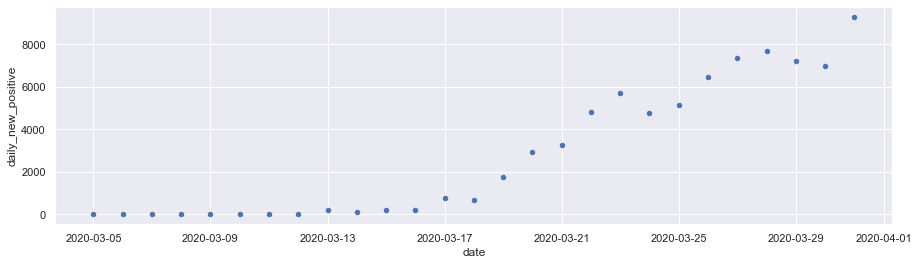

State=NJ  (last_update=2020-03-31T13:00)
Doubling every 2.7 days based on last 10 days of data
(naive estimates: current_unresolved=17369 hosp=2605 icu=694)


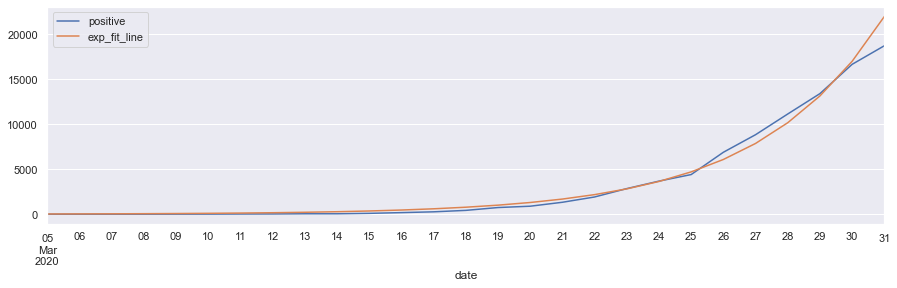

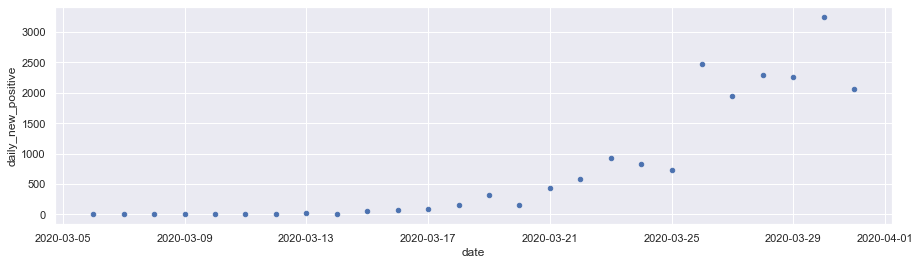

State=CA  (last_update=2020-03-31T16:00)
Doubling every 3.72 days based on last 10 days of data
(naive estimates: current_unresolved=6203 hosp=930 icu=248)


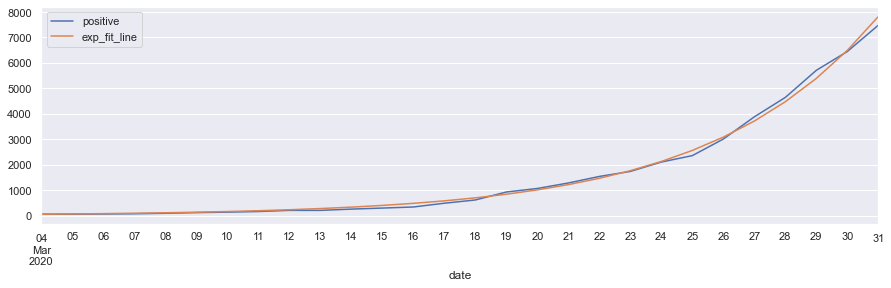

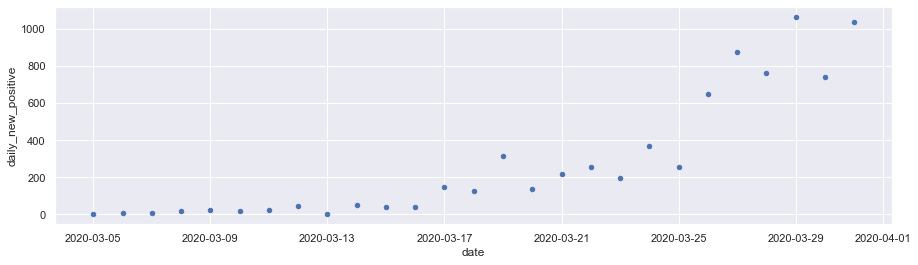

State=MI  (last_update=2020-03-31T11:00)
Doubling every 3.15 days based on last 10 days of data
(naive estimates: current_unresolved=6828 hosp=1024 icu=273)


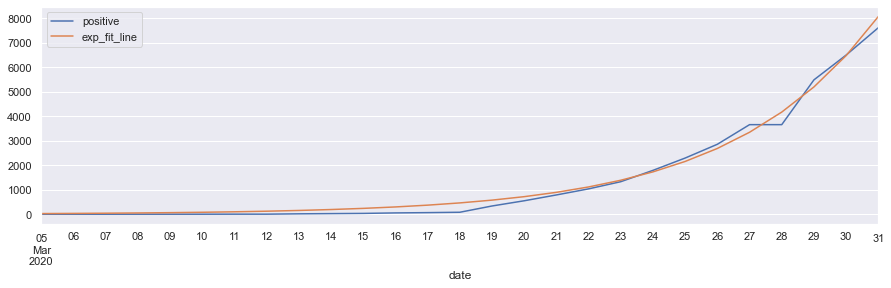

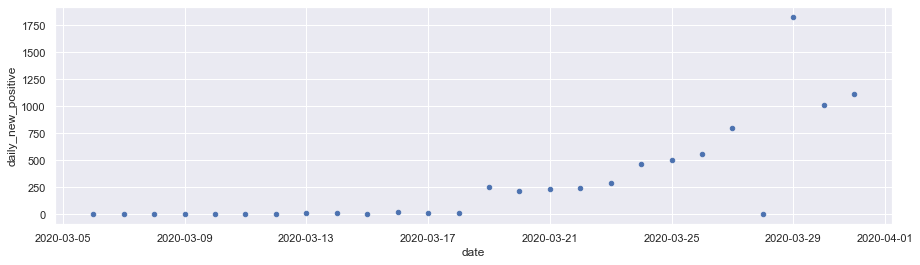

State=FL  (last_update=2020-03-31T18:30)
Doubling every 3.08 days based on last 10 days of data
(naive estimates: current_unresolved=5680 hosp=852 icu=227)


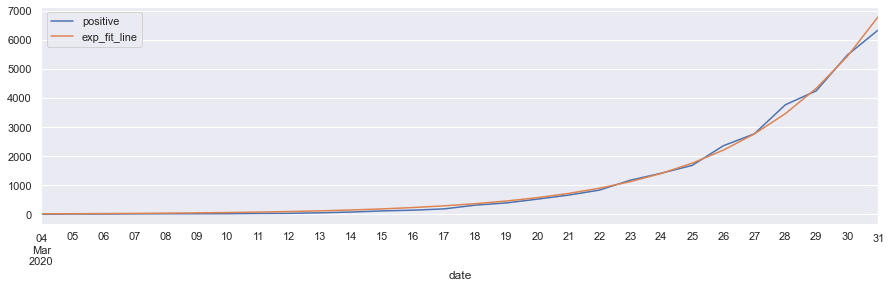

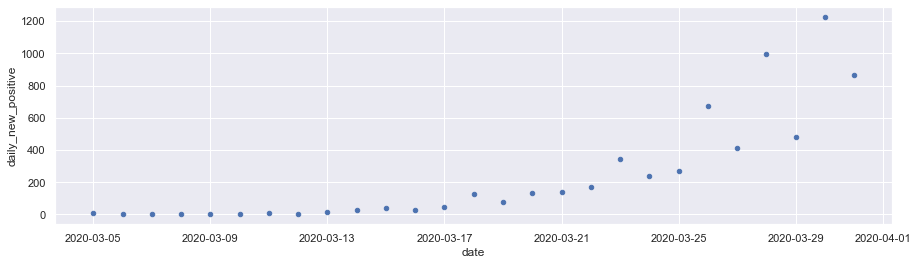

State=MA  (last_update=2020-03-31T12:30)
Doubling every 2.54 days based on last 10 days of data
(naive estimates: current_unresolved=6095 hosp=914 icu=243)


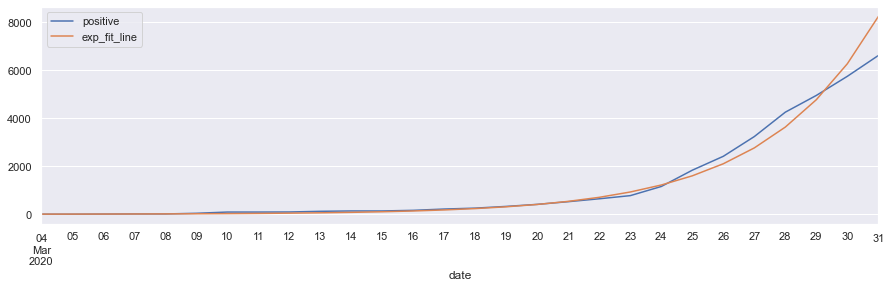

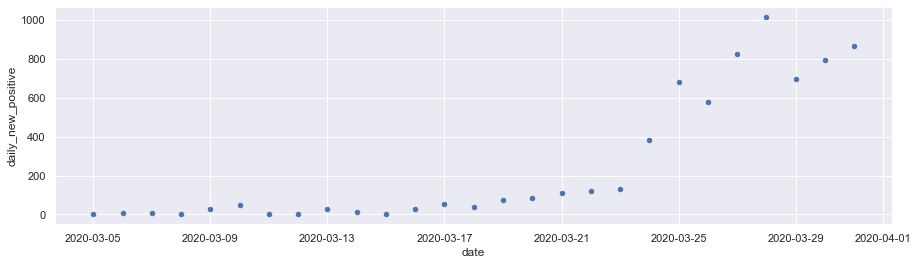

State=IL  (last_update=2020-03-31T00:00)
Doubling every 3.48 days based on last 10 days of data
(naive estimates: current_unresolved=5241 hosp=786 icu=209)


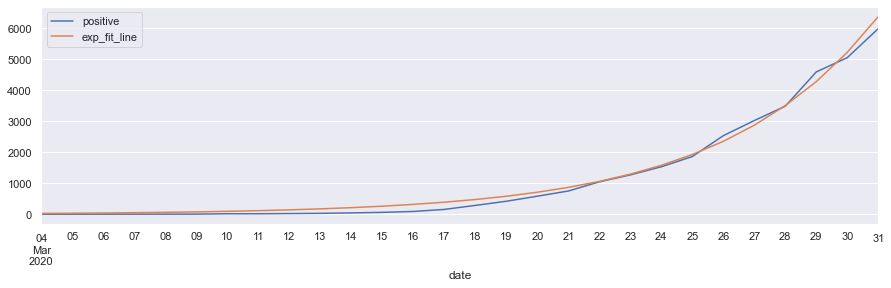

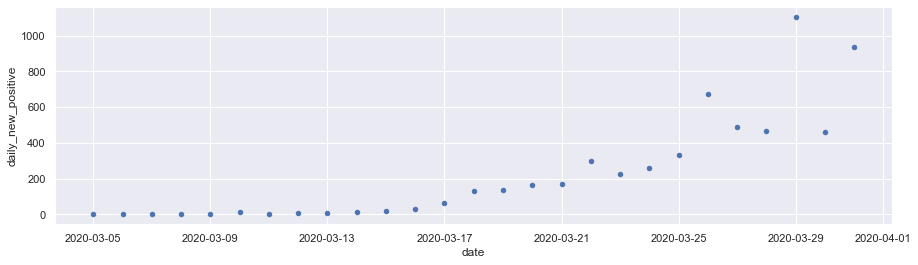

State=LA  (last_update=2020-03-31T13:00)
Doubling every 3.59 days based on last 10 days of data
(naive estimates: current_unresolved=4652 hosp=697 icu=186)


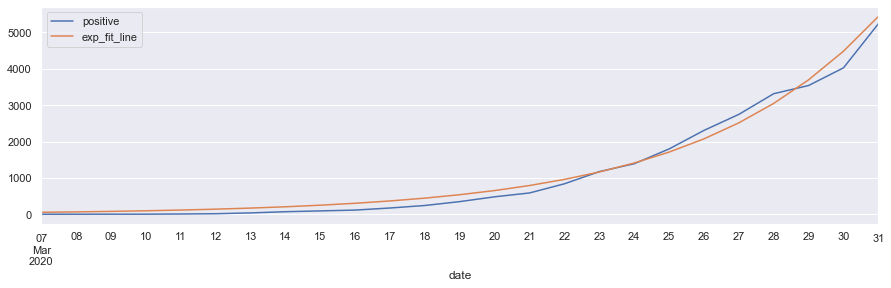

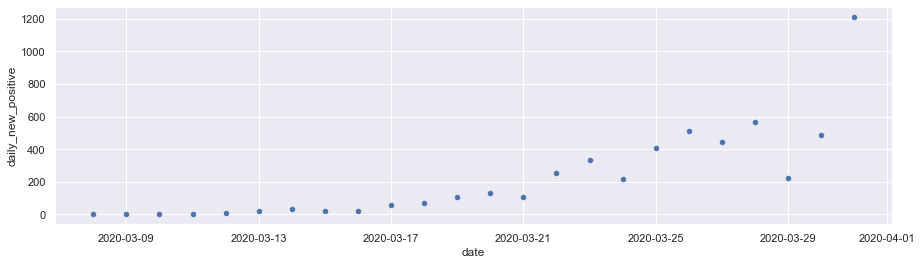

State=WA  (last_update=2020-03-31T00:00)
Doubling every 5.69 days based on last 10 days of data
(naive estimates: current_unresolved=3372 hosp=505 icu=134)


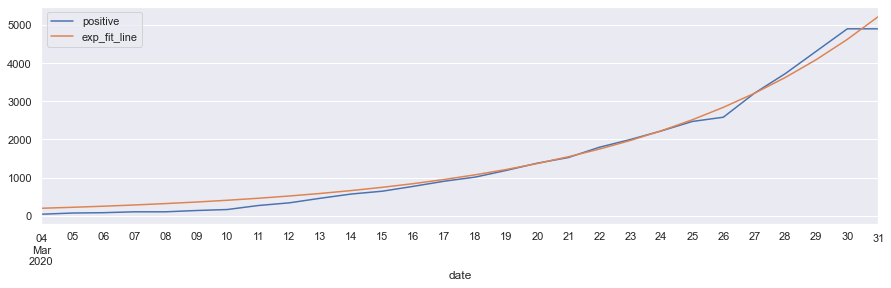

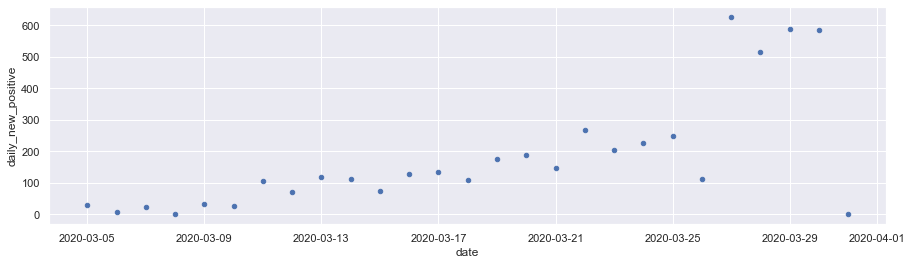

State=PA  (last_update=2020-03-31T12:00)
Doubling every 2.62 days based on last 10 days of data
(naive estimates: current_unresolved=4472 hosp=670 icu=178)


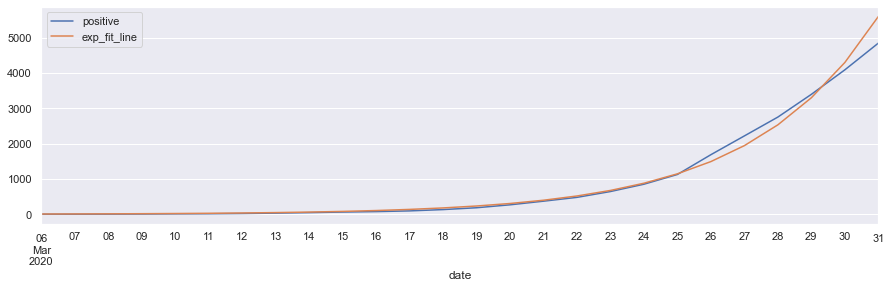

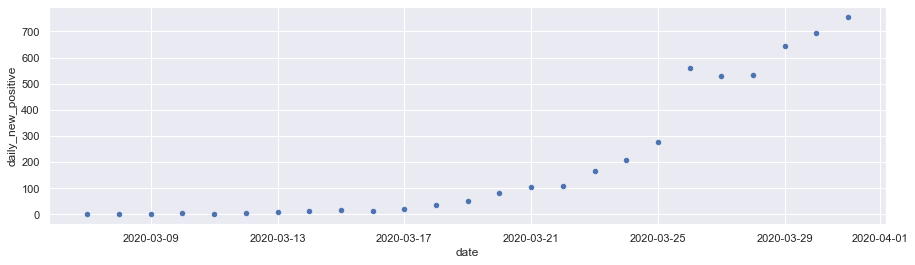

State=GA  (last_update=2020-03-31T18:28)
Doubling every 3.48 days based on last 10 days of data
(naive estimates: current_unresolved=3422 hosp=513 icu=136)


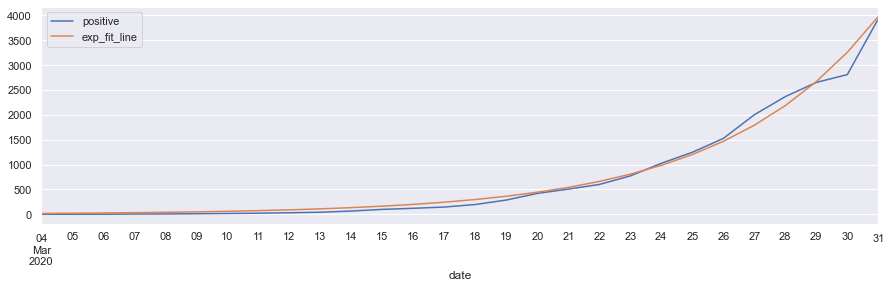

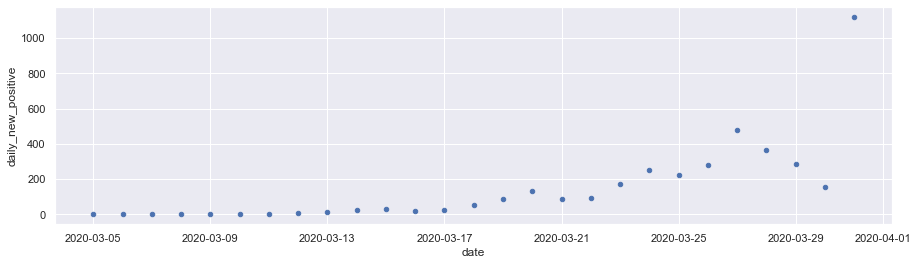

State=TX  (last_update=2020-03-31T13:45)
Doubling every 2.44 days based on last 10 days of data
(naive estimates: current_unresolved=2962 hosp=444 icu=118)


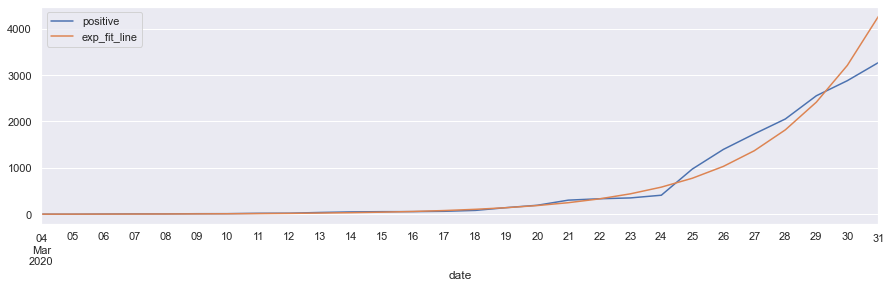

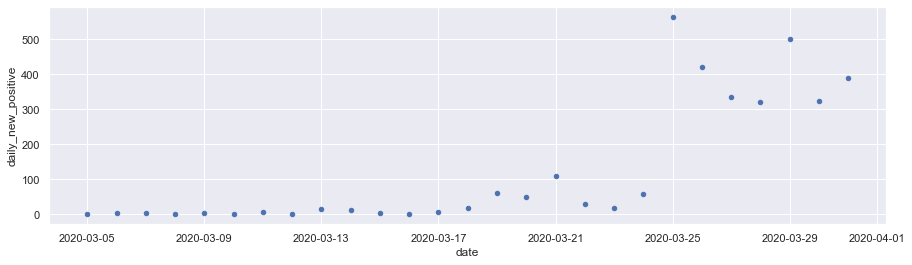

State=CT  (last_update=2020-03-31T13:30)
Doubling every 2.61 days based on last 10 days of data
(naive estimates: current_unresolved=2934 hosp=440 icu=117)


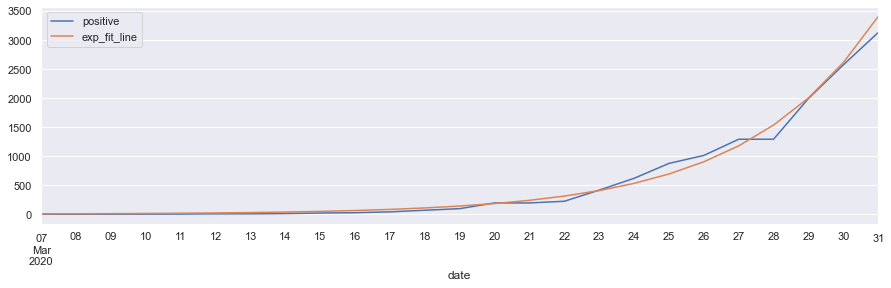

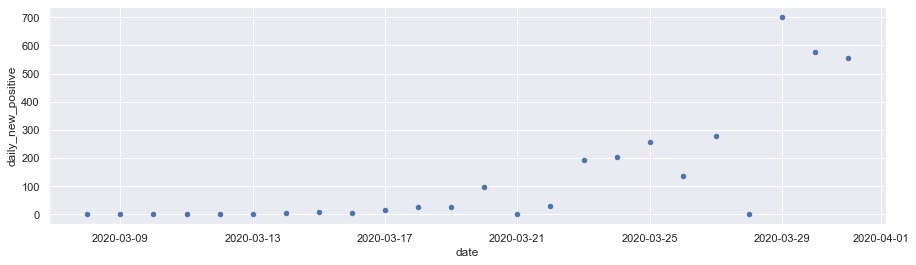

State=CO  (last_update=2020-03-31T18:00)
Doubling every 3.43 days based on last 10 days of data
(naive estimates: current_unresolved=2264 hosp=339 icu=90)


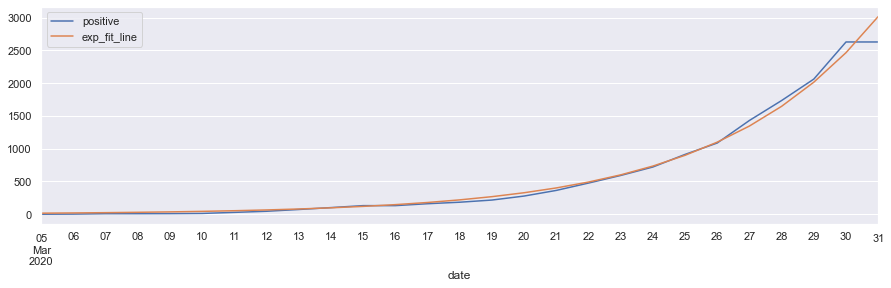

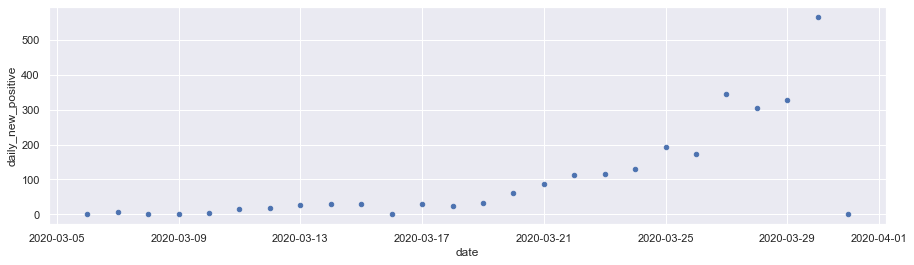

State=TN  (last_update=2020-03-31T15:00)
Doubling every 4.21 days based on last 10 days of data
(naive estimates: current_unresolved=1868 hosp=280 icu=74)


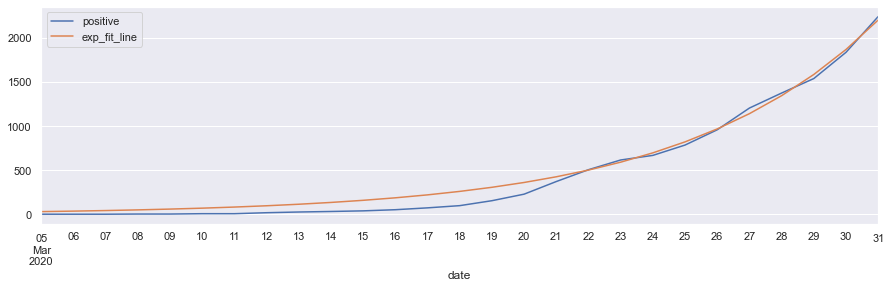

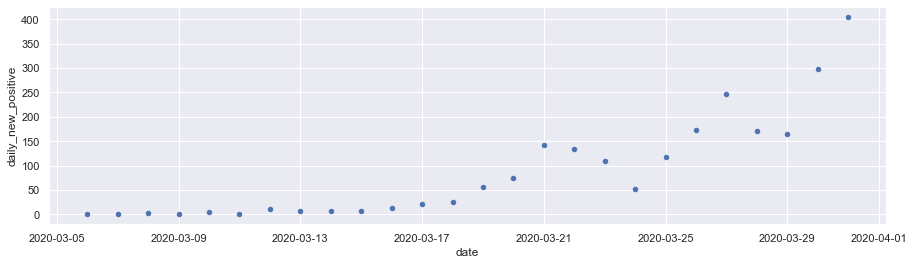

State=OH  (last_update=2020-03-31T14:00)
Doubling every 3.31 days based on last 10 days of data
(naive estimates: current_unresolved=1952 hosp=292 icu=78)


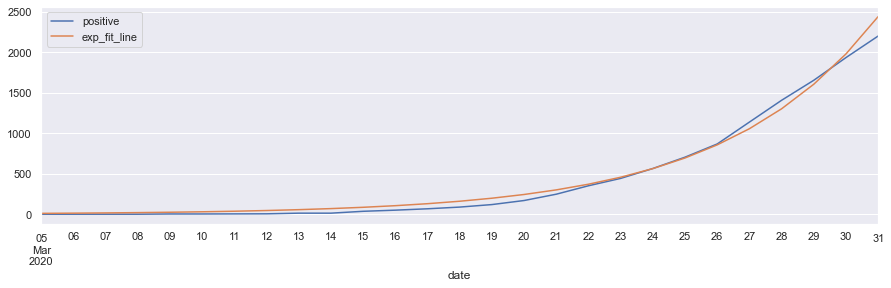

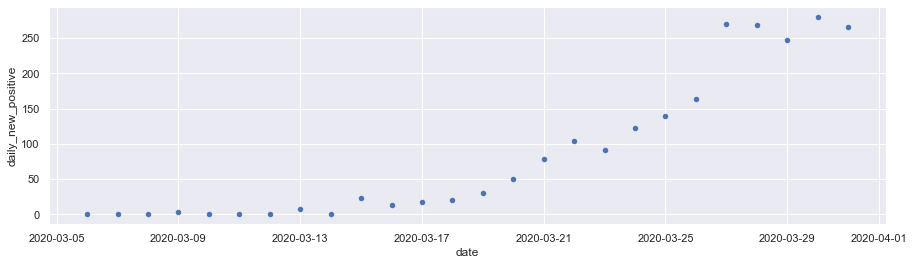

State=IN  (last_update=2020-03-31T00:59)
Doubling every 2.53 days based on last 10 days of data
(naive estimates: current_unresolved=2033 hosp=304 icu=81)


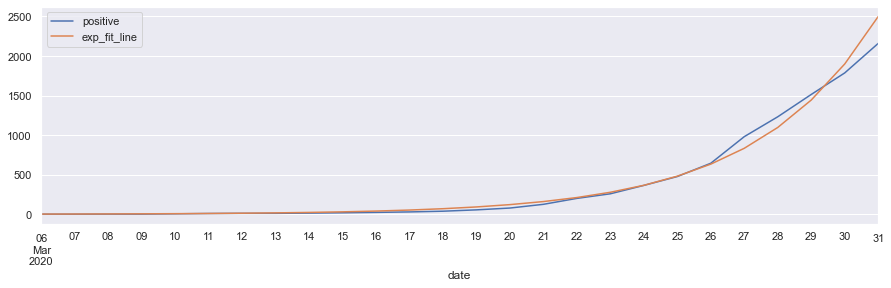

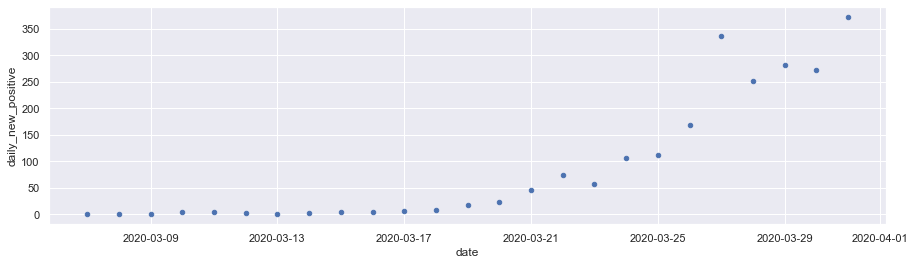

State=MD  (last_update=2020-04-01T10:00)
Doubling every 3.04 days based on last 10 days of data
(naive estimates: current_unresolved=1470 hosp=220 icu=58)


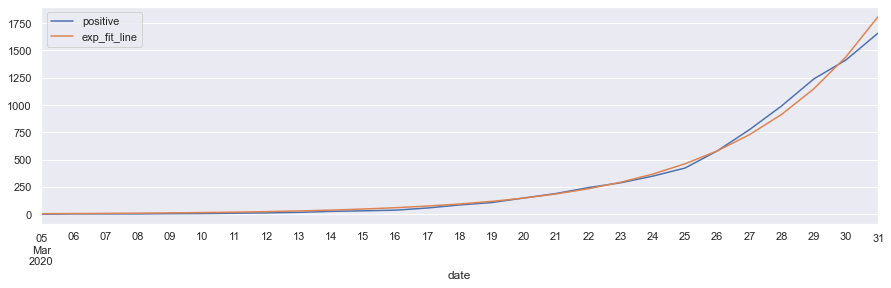

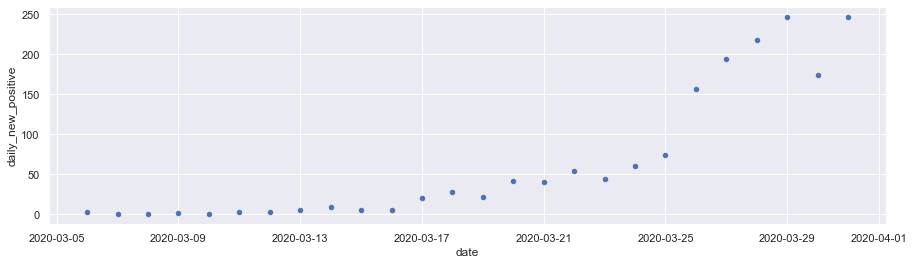

State=NC  (last_update=2020-03-31T09:05)
Doubling every 3.45 days based on last 10 days of data
(naive estimates: current_unresolved=1314 hosp=197 icu=52)


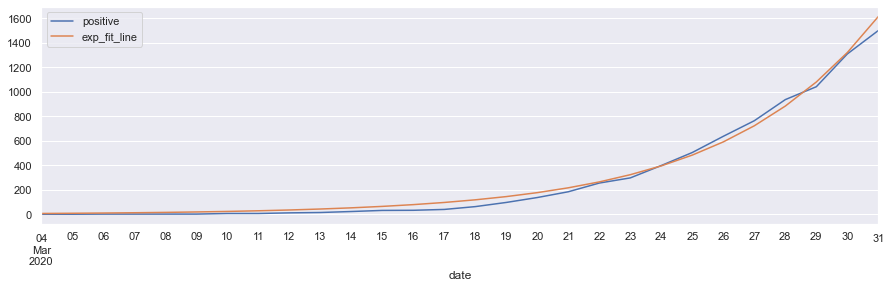

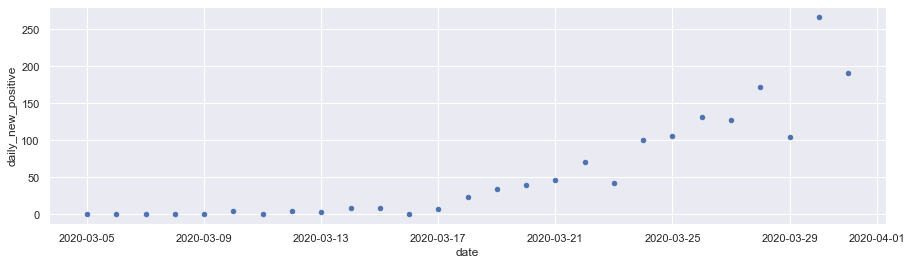

State=VA  (last_update=2020-04-01T00:00)
Doubling every 3.45 days based on last 10 days of data
(naive estimates: current_unresolved=1098 hosp=164 icu=43)


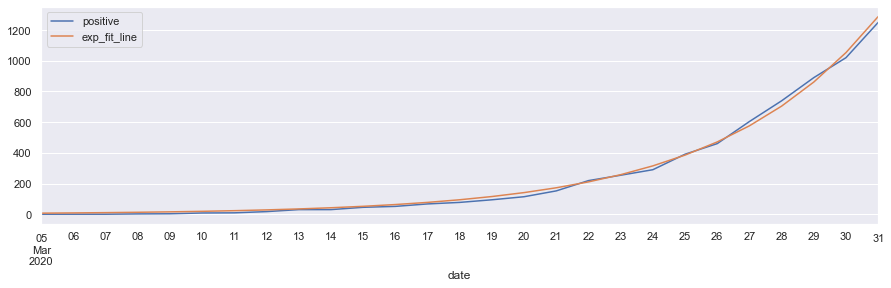

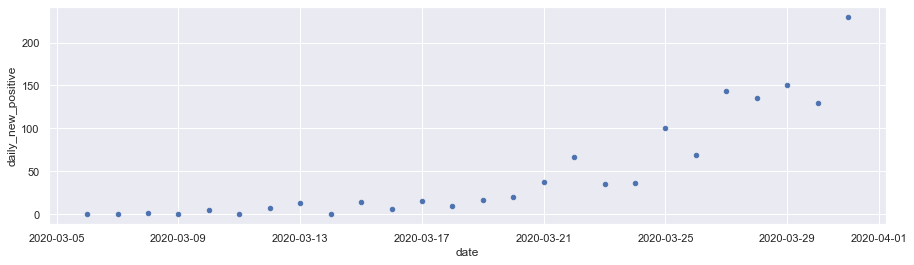

State=WI  (last_update=2020-03-31T16:00)
Doubling every 4.57 days based on last 10 days of data
(naive estimates: current_unresolved=1070 hosp=160 icu=42)


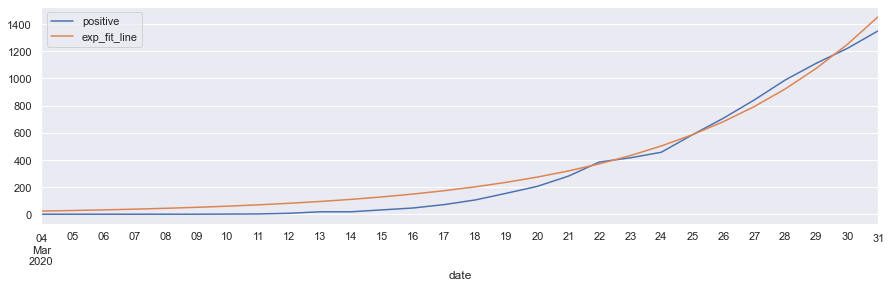

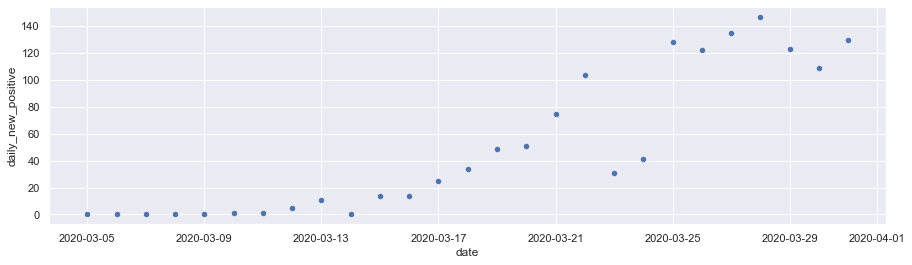

State=MO  (last_update=2020-03-31T15:00)
Doubling every 2.44 days based on last 10 days of data
(naive estimates: current_unresolved=1254 hosp=188 icu=50)


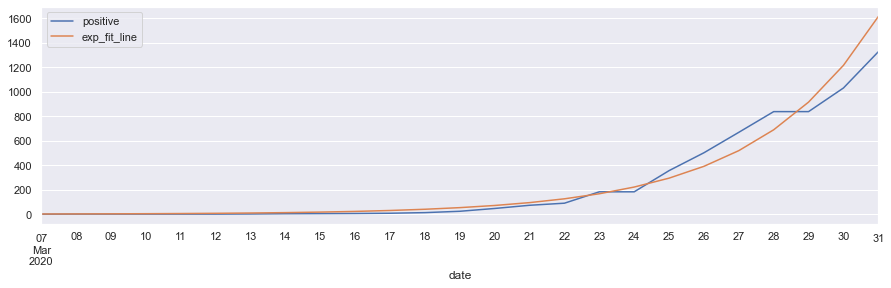

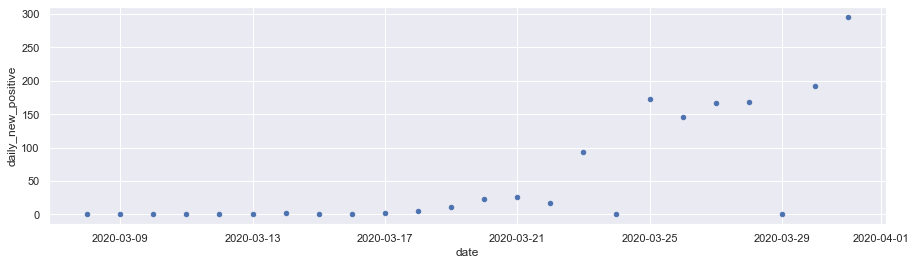

State=AZ  (last_update=2020-03-31T00:00)
Doubling every 3.13 days based on last 10 days of data
(naive estimates: current_unresolved=1185 hosp=177 icu=47)


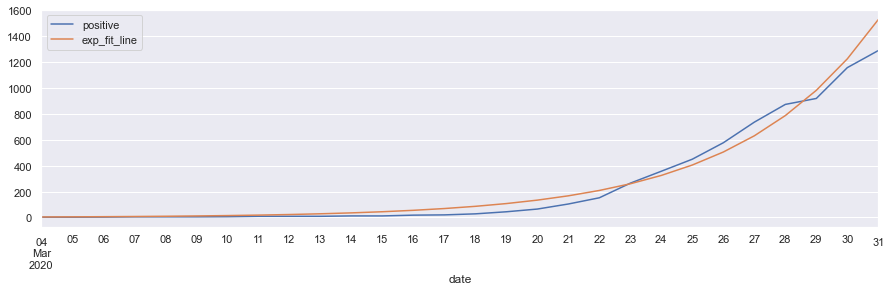

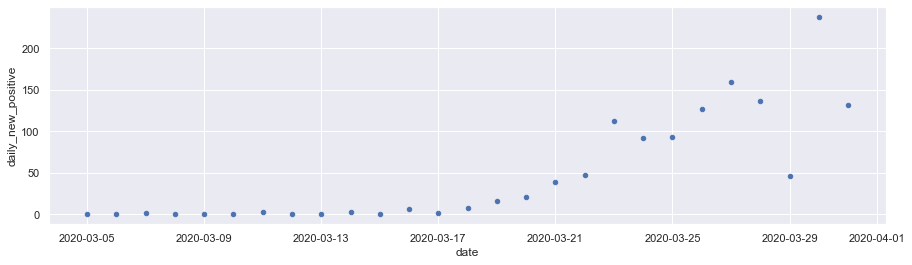

State=NV  (last_update=2020-03-31T09:30)
Doubling every 3.47 days based on last 10 days of data
(naive estimates: current_unresolved=989 hosp=148 icu=39)


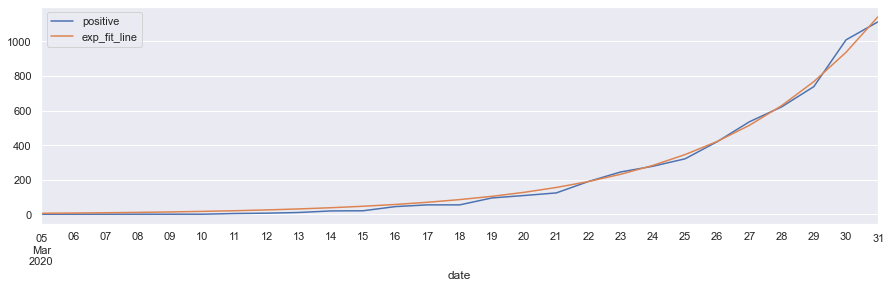

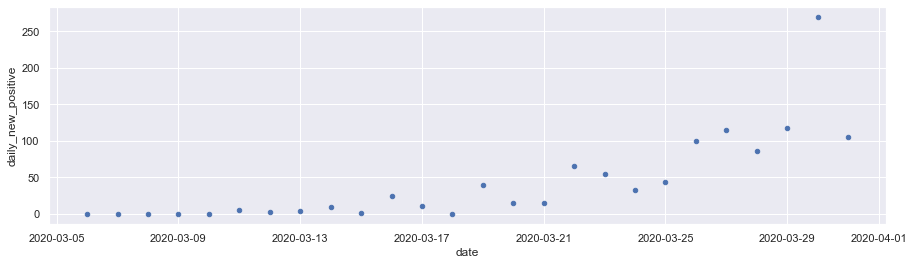

State=SC  (last_update=2020-03-31T16:31)
Doubling every 3.97 days based on last 10 days of data
(naive estimates: current_unresolved=931 hosp=139 icu=37)


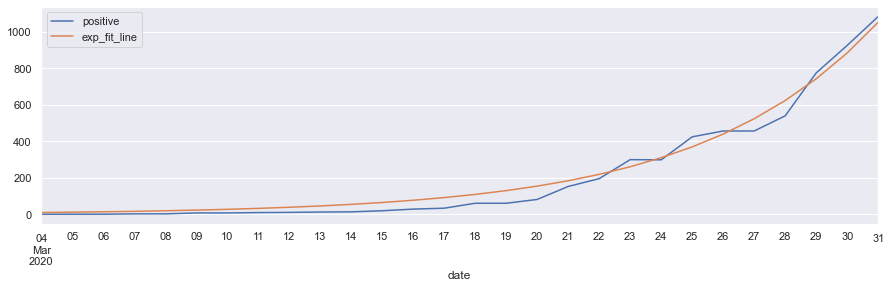

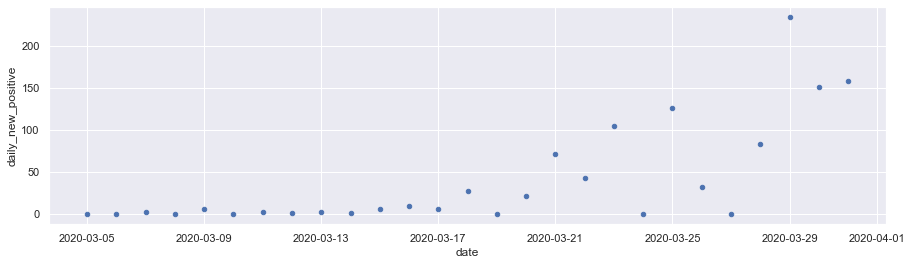

State=AL  (last_update=2020-04-01T00:00)
Doubling every 2.97 days based on last 10 days of data
(naive estimates: current_unresolved=857 hosp=128 icu=34)


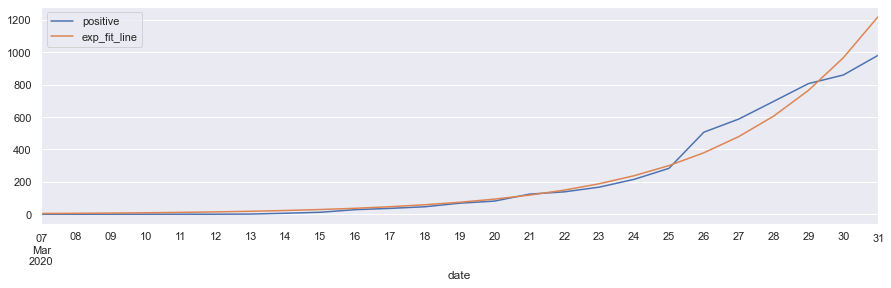

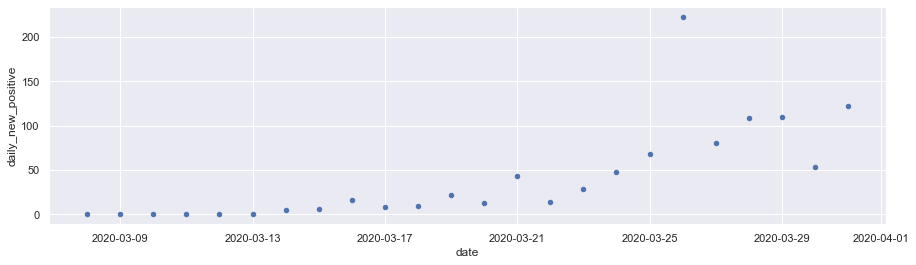

State=MS  (last_update=2020-03-30T19:00)
Doubling every 4.04 days based on last 10 days of data
(naive estimates: current_unresolved=797 hosp=119 icu=31)


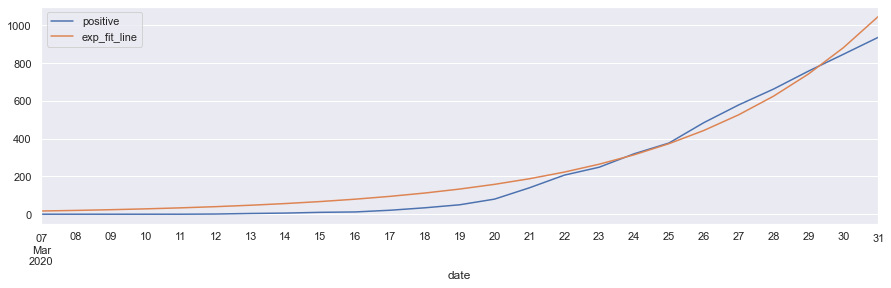

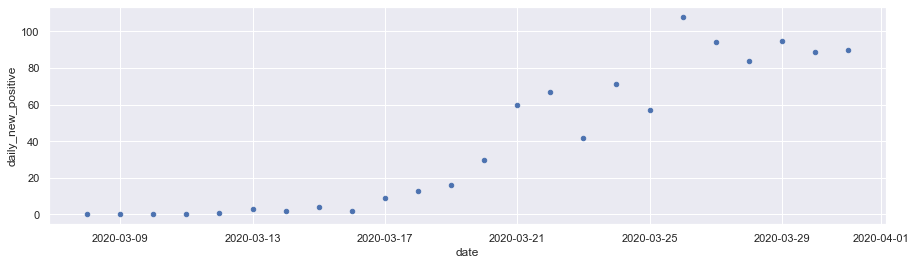

State=UT  (last_update=2020-03-31T15:00)
Doubling every 4.01 days based on last 10 days of data
(naive estimates: current_unresolved=751 hosp=112 icu=30)


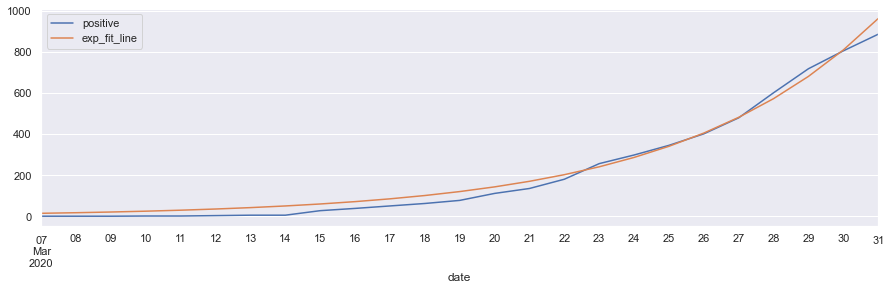

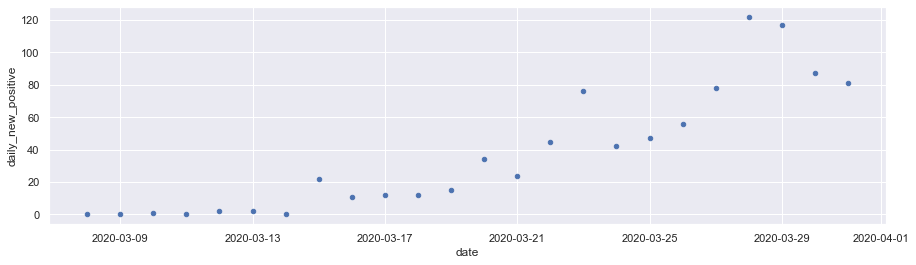

State=OR  (last_update=2020-03-31T11:00)
Doubling every 3.98 days based on last 10 days of data
(naive estimates: current_unresolved=576 hosp=86 icu=23)


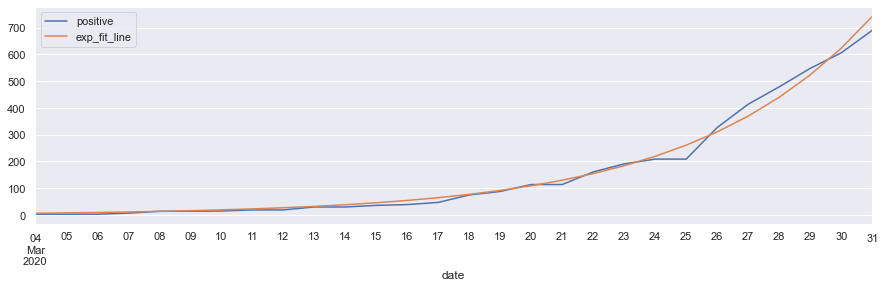

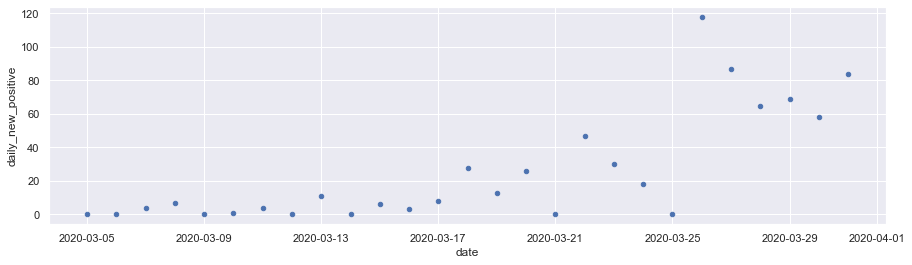

State=MN  (last_update=2020-04-01T00:00)
Doubling every 5.02 days based on last 10 days of data
(naive estimates: current_unresolved=491 hosp=73 icu=19)


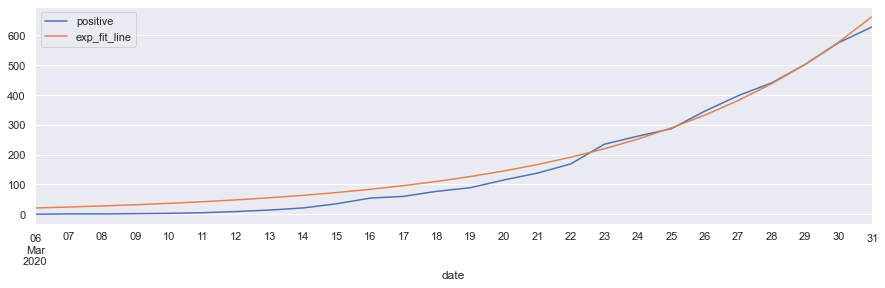

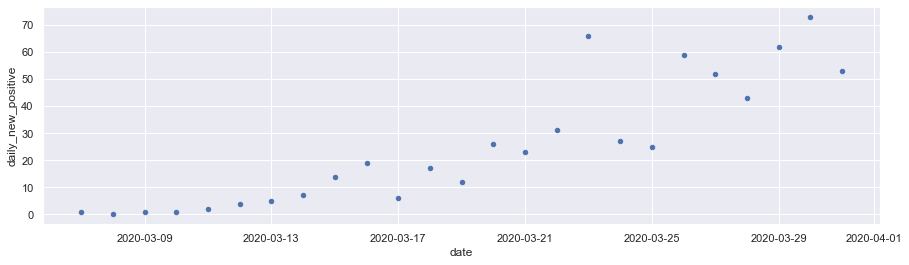

State=KY  (last_update=2020-03-31T17:00)
Doubling every 3.55 days based on last 10 days of data
(naive estimates: current_unresolved=426 hosp=63 icu=17)


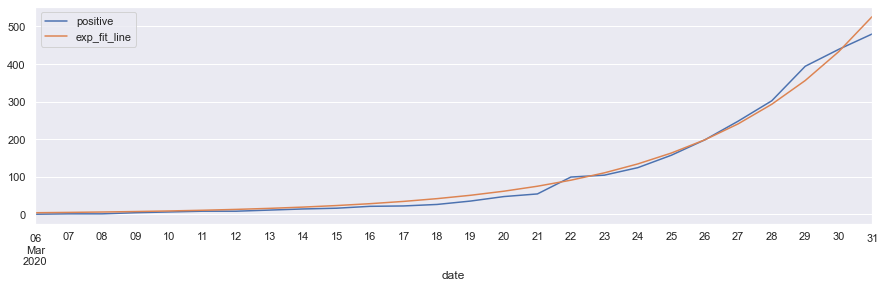

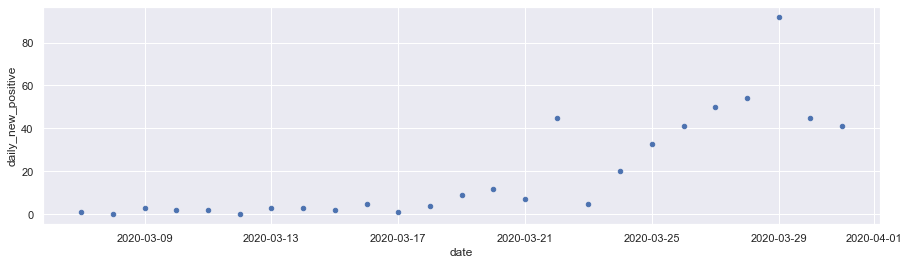

State=OK  (last_update=2020-03-31T08:00)
Doubling every 2.76 days based on last 10 days of data
(naive estimates: current_unresolved=512 hosp=76 icu=20)


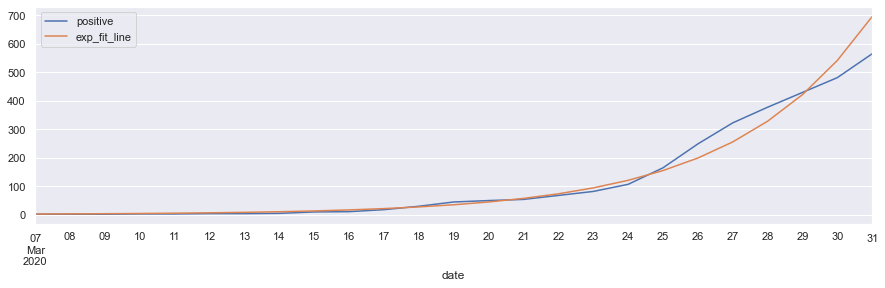

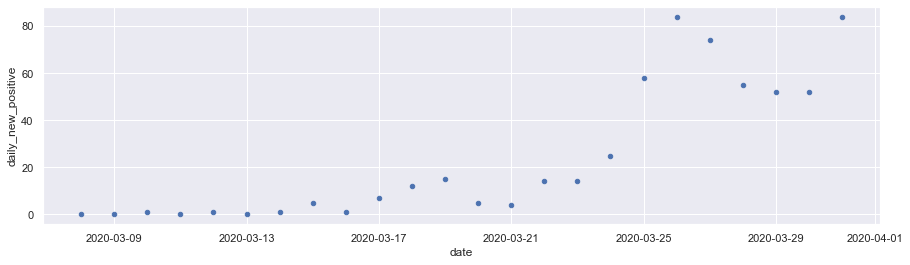

State=AR  (last_update=2020-03-31T22:04)
Doubling every 5.21 days based on last 10 days of data
(naive estimates: current_unresolved=405 hosp=60 icu=16)


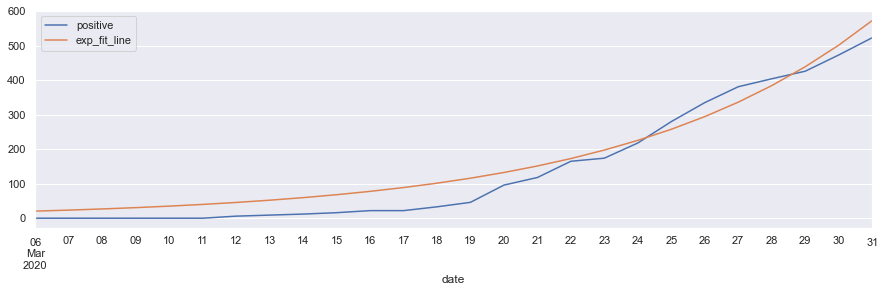

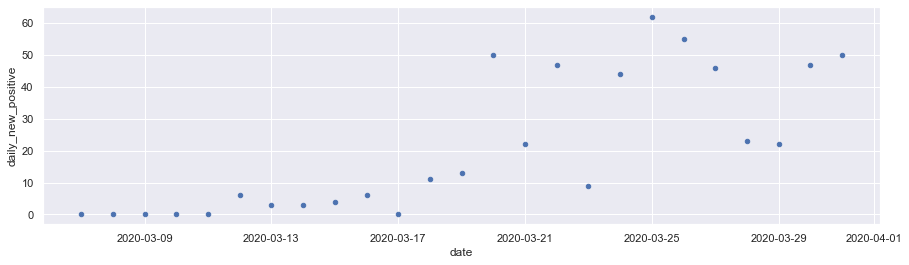

State=ID  (last_update=2020-03-31T19:00)
Doubling every 2.49 days based on last 10 days of data
(naive estimates: current_unresolved=384 hosp=57 icu=15)


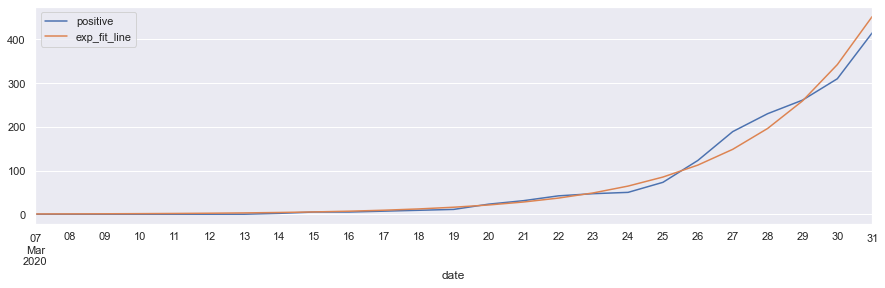

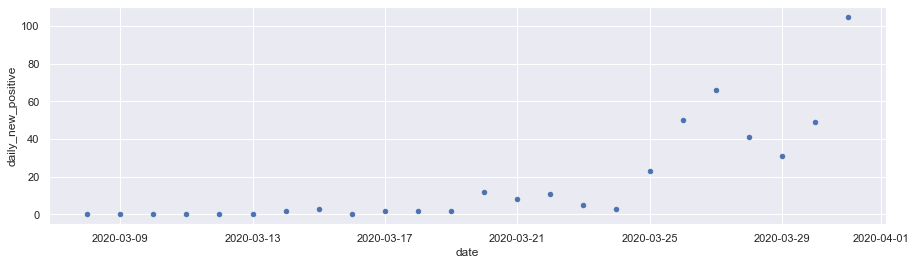

State=DC  (last_update=2020-03-31T21:24)
Doubling every 3.88 days based on last 10 days of data
(naive estimates: current_unresolved=418 hosp=62 icu=16)


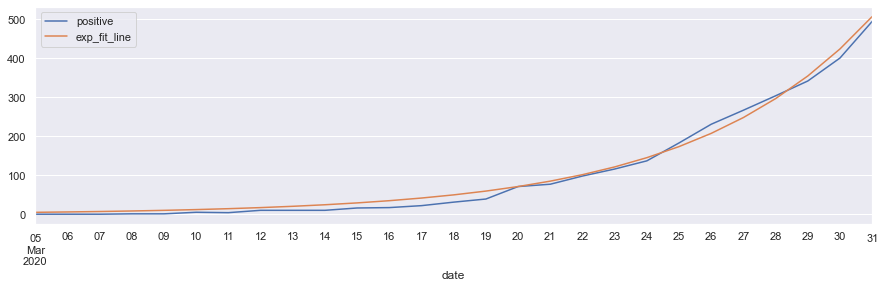

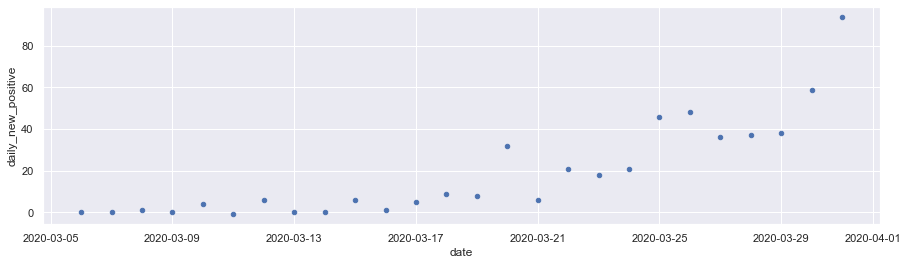

State=IA  (last_update=2020-03-31T00:00)
Doubling every 3.51 days based on last 10 days of data
(naive estimates: current_unresolved=429 hosp=64 icu=17)


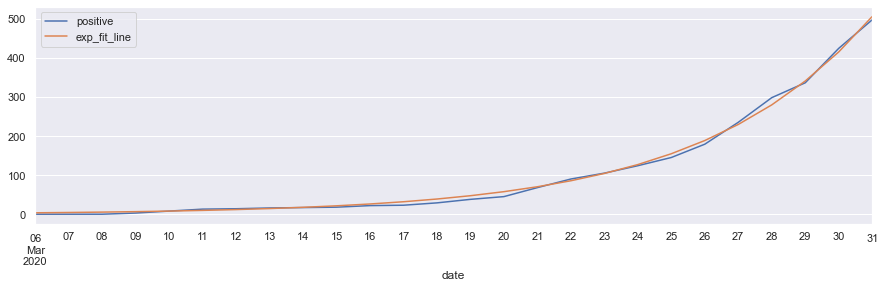

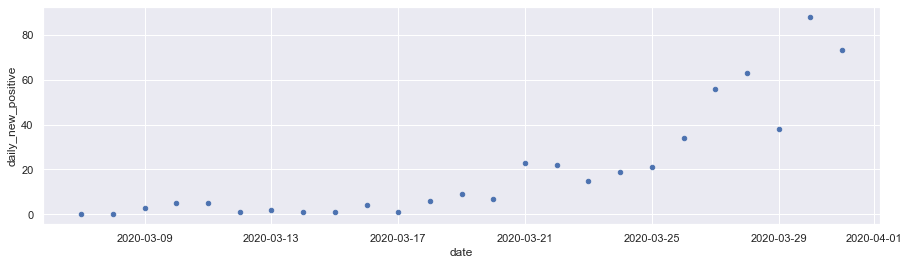

State=RI  (last_update=2020-03-31T00:00)
Doubling every 3.58 days based on last 10 days of data
(naive estimates: current_unresolved=422 hosp=63 icu=16)


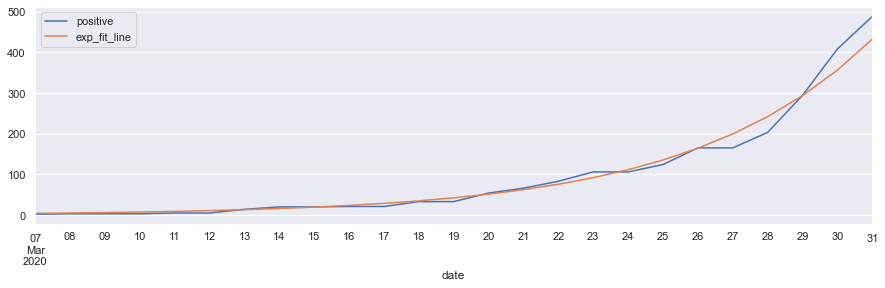

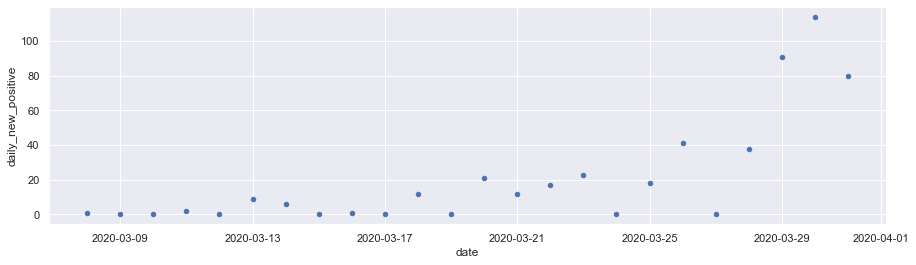

State=KS  (last_update=2020-03-31T11:00)
Doubling every 3.19 days based on last 10 days of data
(naive estimates: current_unresolved=373 hosp=55 icu=14)


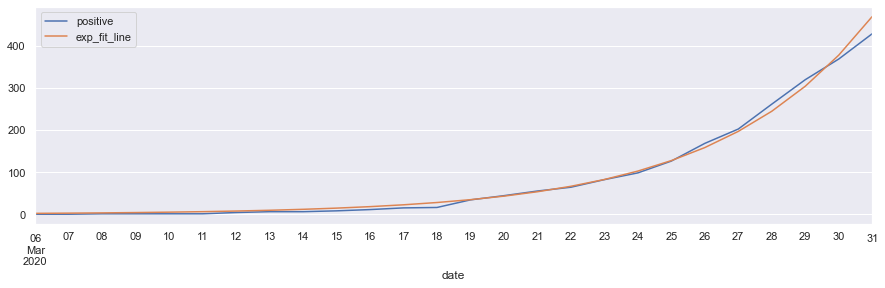

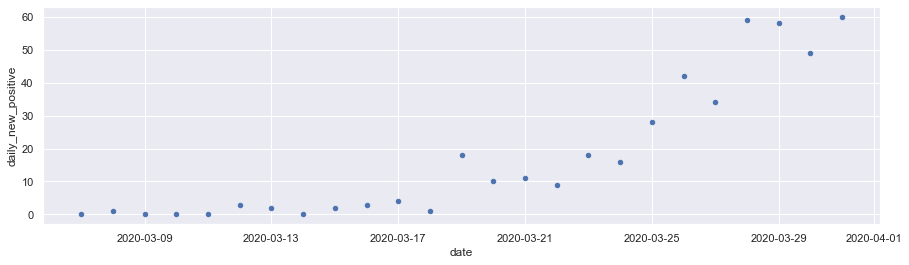

State=NH  (last_update=2020-03-31T09:00)
Doubling every 3.88 days based on last 10 days of data
(naive estimates: current_unresolved=259 hosp=38 icu=10)


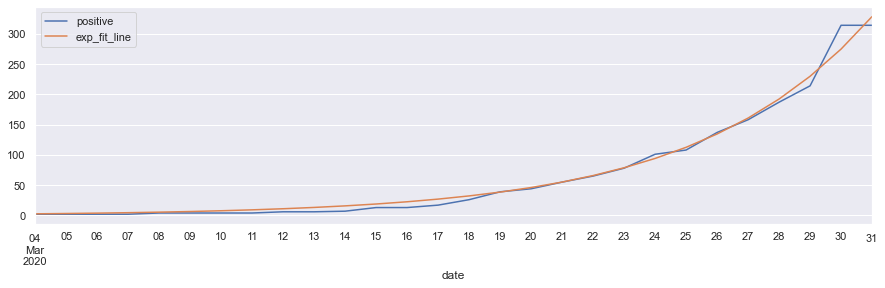

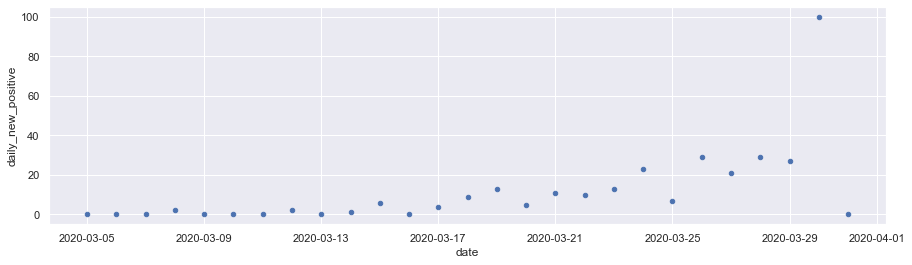

State=DE  (last_update=2020-03-31T16:00)
Doubling every 3.35 days based on last 10 days of data
(naive estimates: current_unresolved=361 hosp=54 icu=14)


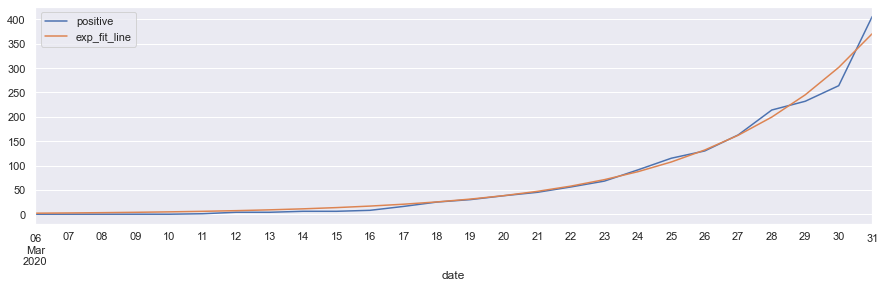

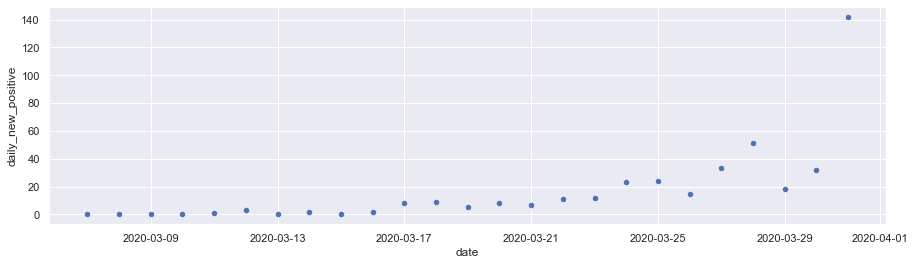

State=NM  (last_update=2020-03-31T22:22)
Doubling every 3.71 days based on last 10 days of data
(naive estimates: current_unresolved=224 hosp=33 icu=8)


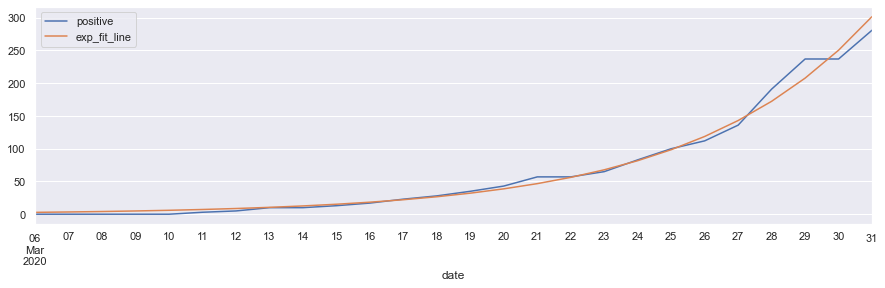

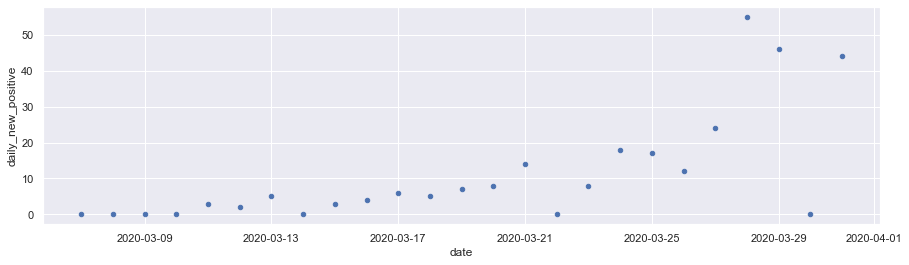

State=ME  (last_update=2020-03-31T10:30)
Doubling every 5.13 days based on last 10 days of data
(naive estimates: current_unresolved=230 hosp=34 icu=9)


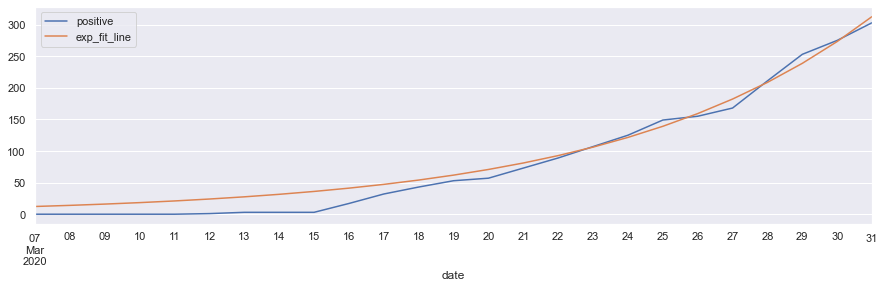

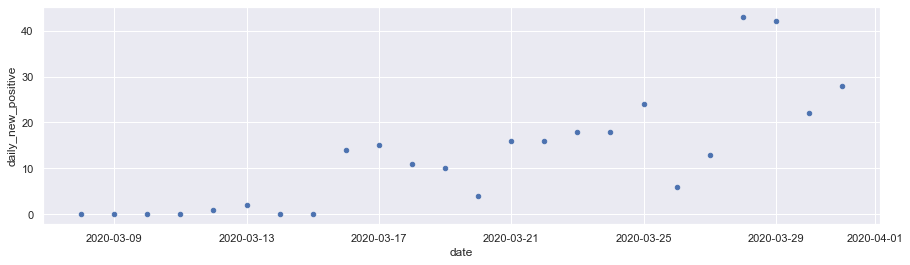

State=VT  (last_update=2020-03-31T13:00)
Doubling every 3.76 days based on last 10 days of data
(naive estimates: current_unresolved=264 hosp=39 icu=10)


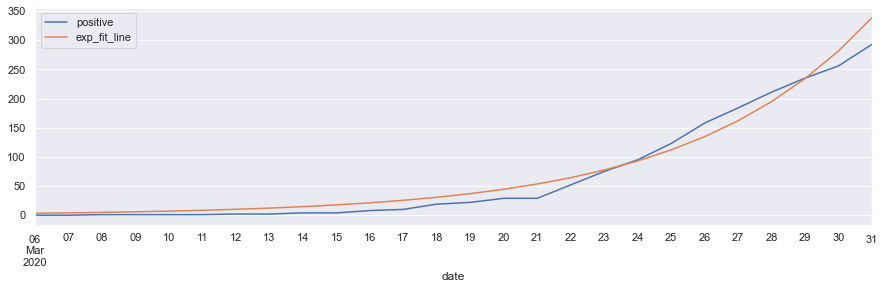

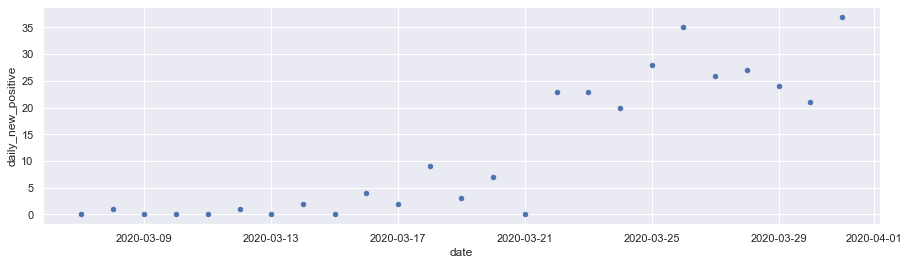

State=PR  (last_update=2020-04-01T07:00)
Doubling every 2.77 days based on last 10 days of data
(naive estimates: current_unresolved=218 hosp=32 icu=8)


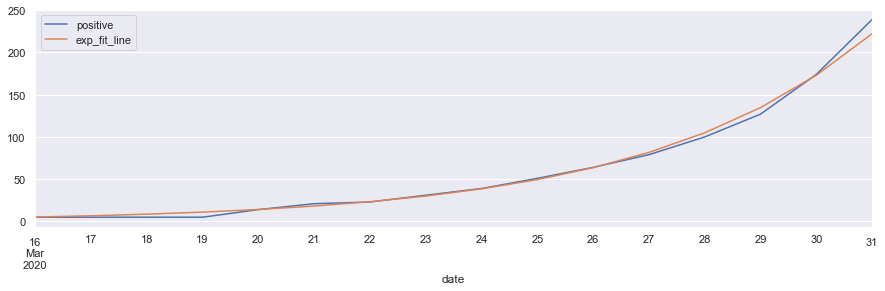

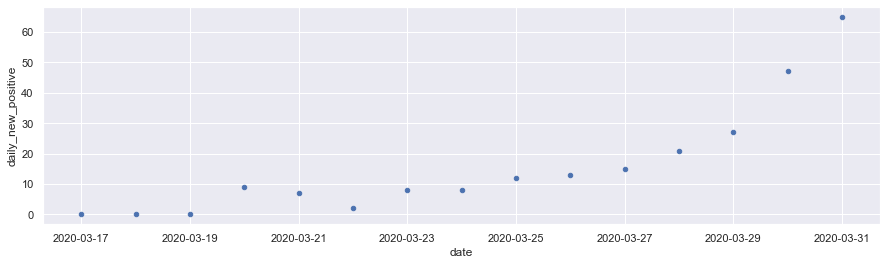

State=HI  (last_update=2020-03-31T18:00)
Doubling every 4.51 days based on last 10 days of data
(naive estimates: current_unresolved=167 hosp=25 icu=6)


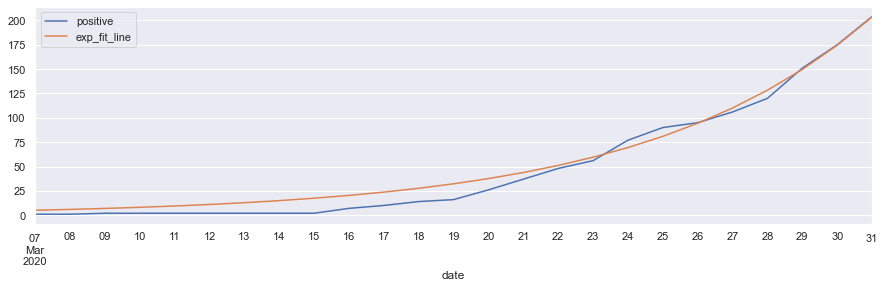

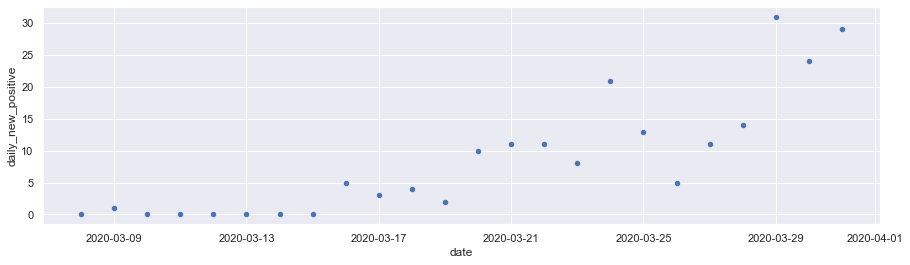

State=MT  (last_update=2020-04-01T10:00)
Doubling every 3.14 days based on last 10 days of data
(naive estimates: current_unresolved=164 hosp=24 icu=6)


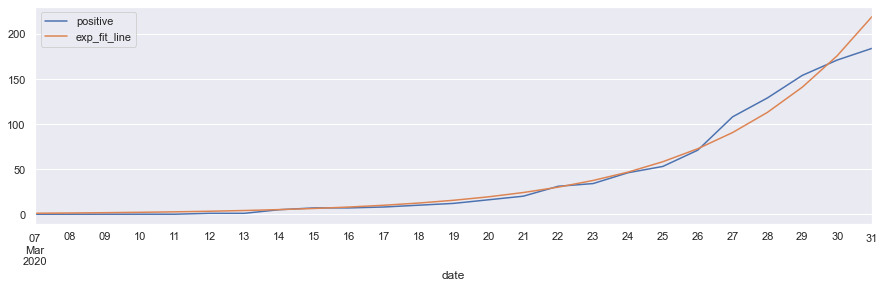

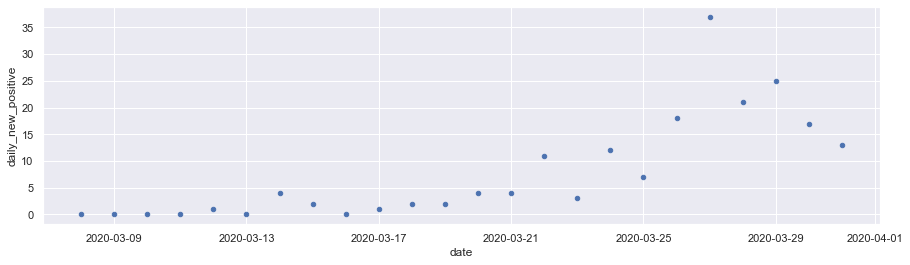

State=NE  (last_update=2020-03-31T19:45)
Doubling every 4.74 days based on last 10 days of data
(naive estimates: current_unresolved=134 hosp=20 icu=5)


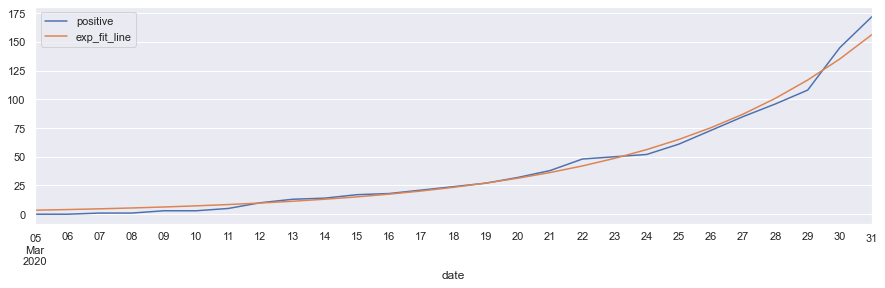

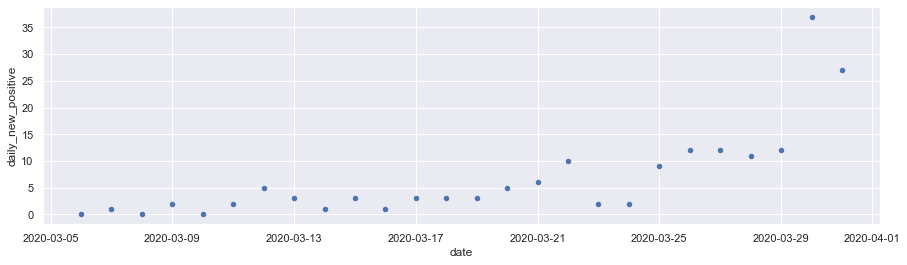

State=WV  (last_update=2020-03-31T00:00)
Doubling every 2.3 days based on last 10 days of data
(naive estimates: current_unresolved=151 hosp=22 icu=6)


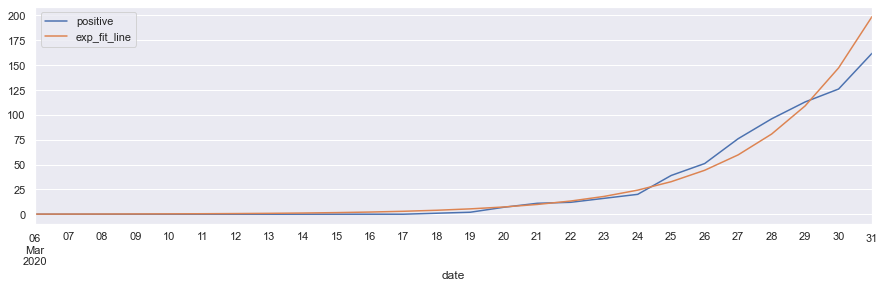

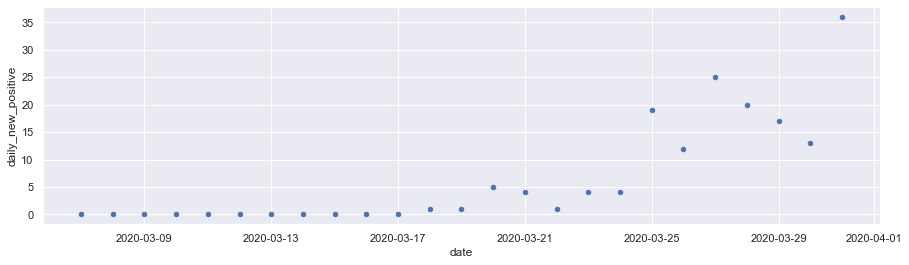

State=AK  (last_update=2020-03-31T19:00)
Doubling every 3.35 days based on last 10 days of data
(naive estimates: current_unresolved=105 hosp=15 icu=4)


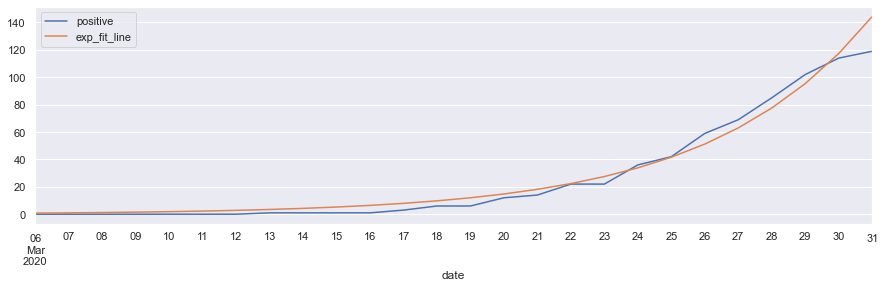

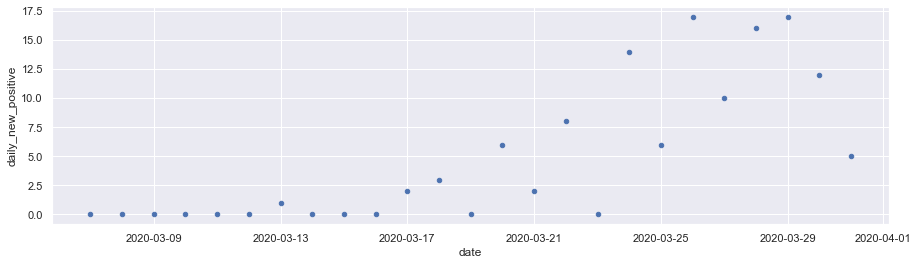

State=ND  (last_update=2020-03-31T18:00)
Doubling every 3.77 days based on last 10 days of data
(naive estimates: current_unresolved=98 hosp=14 icu=3)


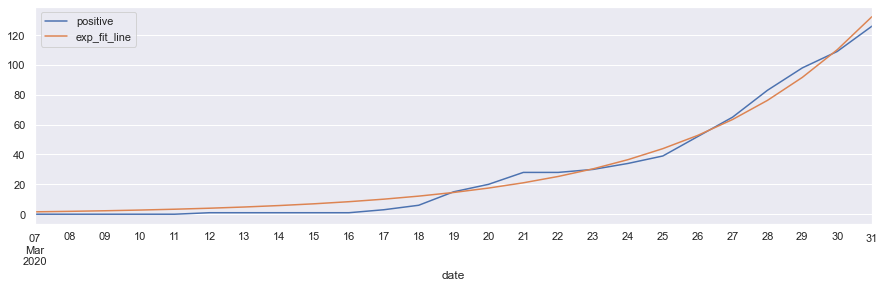

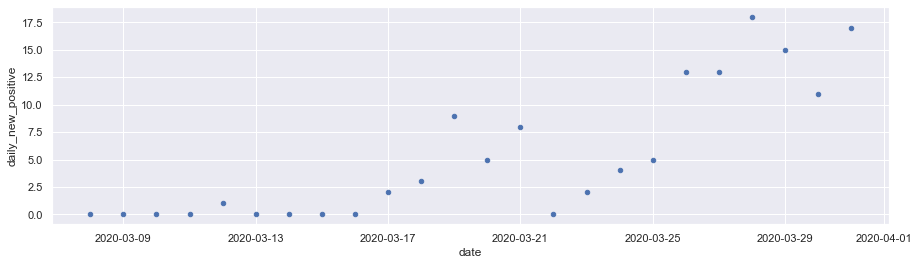

State=WY  (last_update=2020-03-31T19:44)
Doubling every 3.79 days based on last 10 days of data
(naive estimates: current_unresolved=86 hosp=12 icu=3)


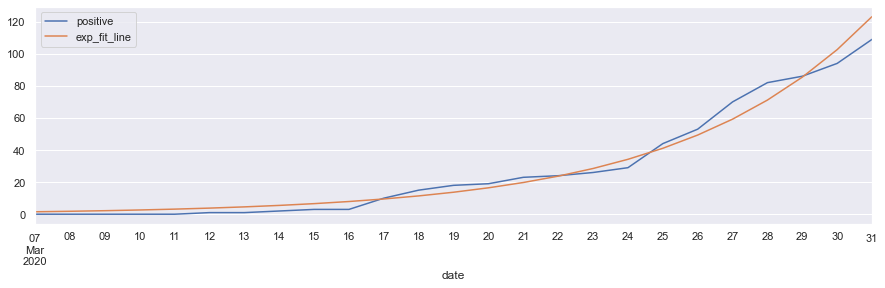

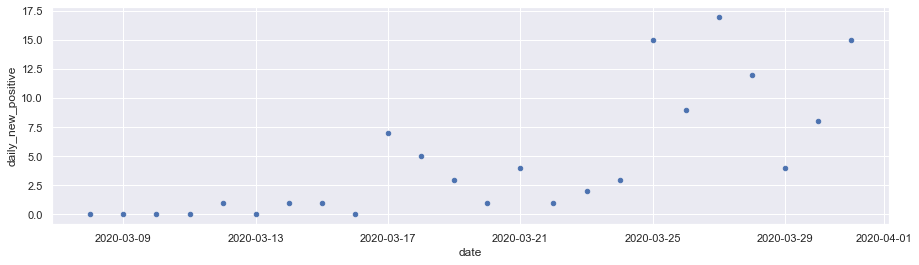

State=SD  (last_update=2020-03-31T12:30)
Doubling every 3.69 days based on last 10 days of data
(naive estimates: current_unresolved=94 hosp=14 icu=3)


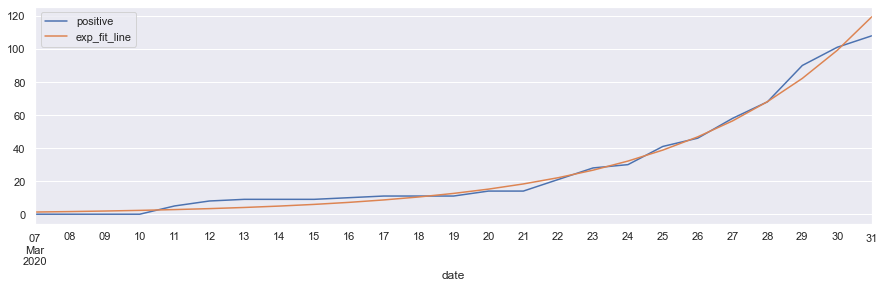

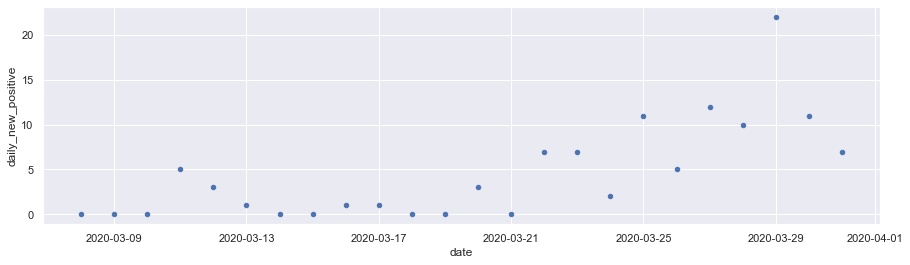

State=GU  (last_update=2020-04-01T08:30)
Doubling every 6.57 days based on last 10 days of data
(naive estimates: current_unresolved=54 hosp=8 icu=2)


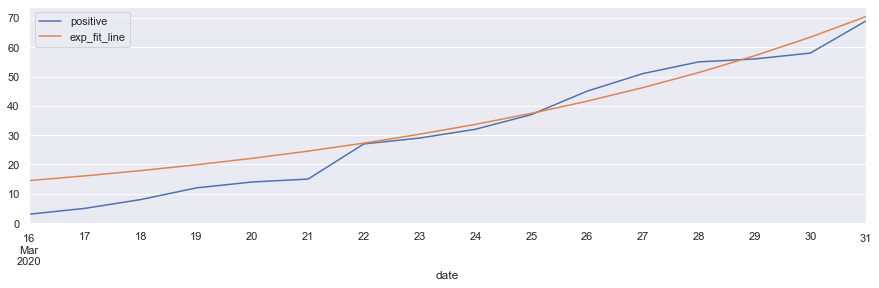

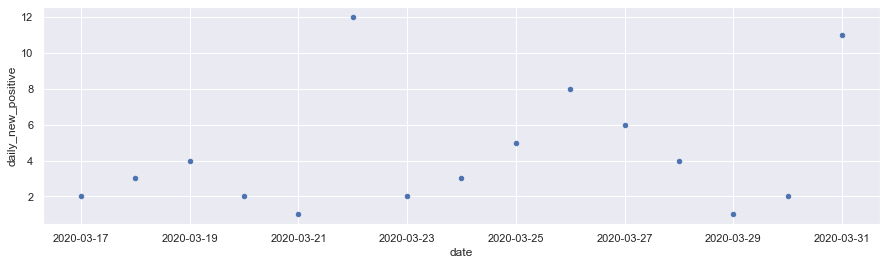

State=VI  (last_update=2020-03-31T17:00)
Doubling every 5.48 days based on last 10 days of data
(naive estimates: current_unresolved=24 hosp=3 icu=0)


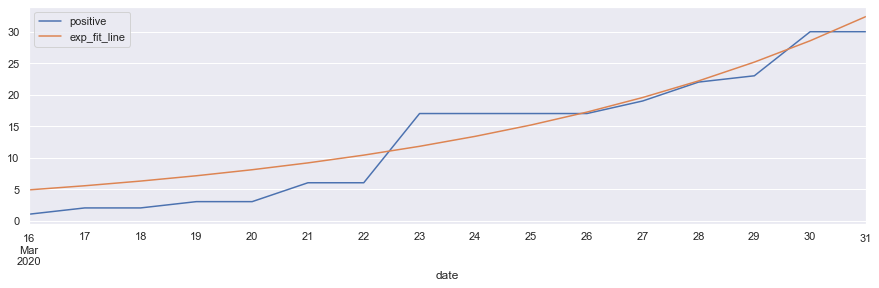

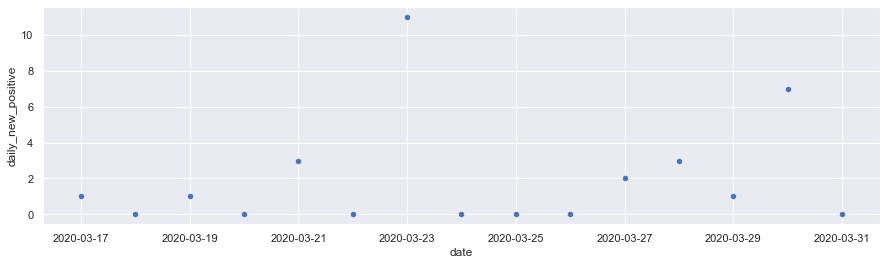

State=MP  (last_update=2020-03-31T21:50)
Doubling every -7.11e+15 days based on last 10 days of data
(naive estimates: current_unresolved=2 hosp=0 icu=0)


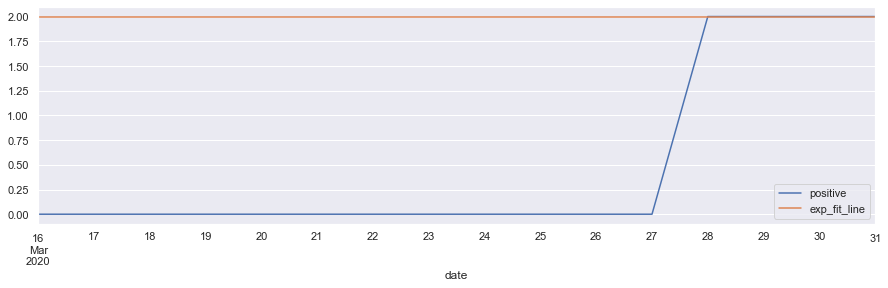

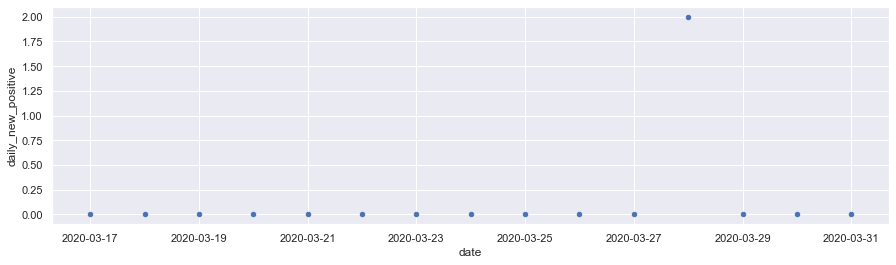

State=AS  (last_update=2020-03-30T23:00)
Doubling every nan days based on last 10 days of data
(naive estimates: current_unresolved=0 hosp=0 icu=0)


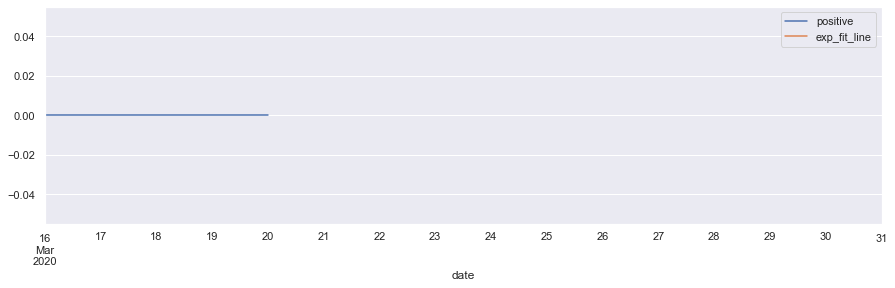

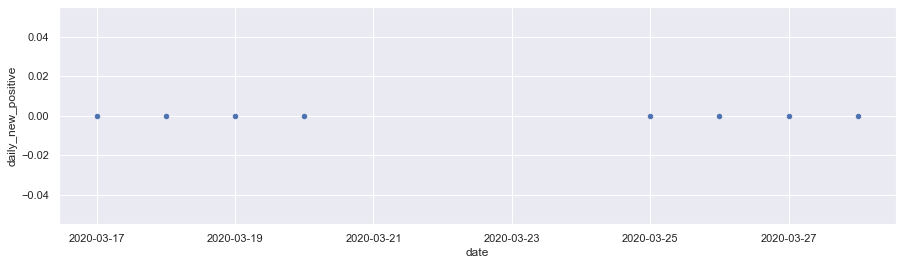

In [14]:
last_n_days = 10
dps = []
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s, use_last_n_days=last_n_days)
    dps.append(dt)
    cn, cnh, cni = estimate_current_cases(dfq.daily_new_positive.values)
    lu = str(lud)[:16]
    print("State={}  (last_update={})".format(s, lu))
    print("Doubling every {:.3} days based on last {} days of data".format(dt, last_n_days))
    print("(naive estimates: current_unresolved={} hosp={} icu={})".format(cn, cnh, cni))
    dfq.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
    if len(dfq) > 1:
        dfq.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
    plt.show()

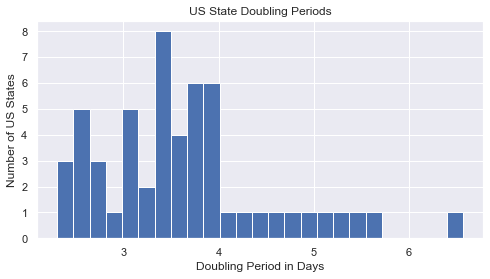

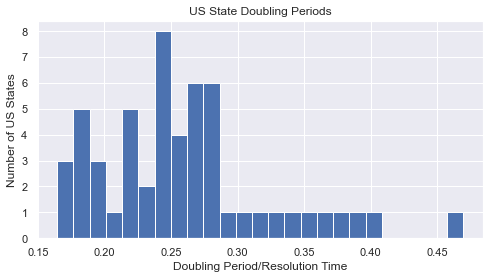

In [15]:
plt.figure(figsize=[8,4])
dps = np.array(dps)
dps = dps[~np.isnan(dps)]
dp_state = dps[dps < 30]
dp_state = dp_state[dp_state > 0]
a = plt.hist(dp_state, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period in Days")
plt.ylabel("Number of US States")
plt.show()
# or in terms of resolution time
plt.figure(figsize=[8,4])
resolution_time = 14
a = plt.hist(dp_state/resolution_time, bins=25)
plt.title("US State Doubling Periods")
plt.xlabel("Doubling Period/Resolution Time")
plt.ylabel("Number of US States")
plt.show()

### Rolling Doubling Period for US

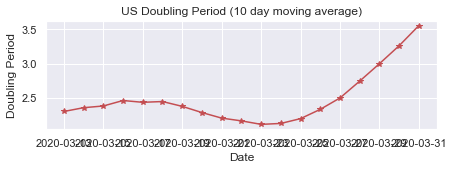

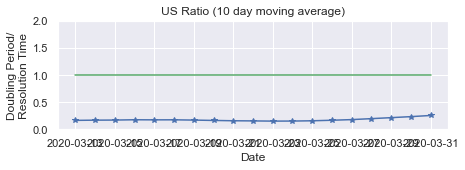

In [16]:
window_size = 10 # days
start_date, end_date = df.date.min(), df.date.max()
delta_t = pd.Timedelta(days=1)
days = int((end_date - start_date).days)
dtv = []
dtt = []
for i in range(days-window_size+2):
    sdt = start_date + i * delta_t
    edt = sdt + window_size * delta_t
    _df = df.loc[(df.date >= sdt) & (df.date < edt)].copy()
    dfa, dt, lud = get_state_doubling_df(_df, "*", use_last_n_days=window_size)
    dtv.append(dt)
    dtt.append(_df.date.values[-1])
plt.figure(figsize=[7,2])
plt.plot(dtt, dtv, "*r-")
plt.title("US Doubling Period ({} day moving average)".format(window_size))
plt.ylabel("Doubling Period")
plt.xlabel("Date")
plt.show()
# by ratio
plt.figure(figsize=[7,2])
plt.plot(dtt, np.array(dtv)/resolution_time, "*b-")
plt.plot(dtt, np.ones(len(dtt)), "g")
plt.title("US Ratio ({} day moving average)".format(window_size))
plt.ylim((0,2))
plt.ylabel("Doubling Period/\nResolution Time")
plt.xlabel("Date")
plt.show()

### Rolling Doubling Period World

In [17]:
dfw, wsl = get_world_dataset_df_from_file()
dfw.head()

,Entity,state,Date,positive,date,lastUpdateEt,negative,pending
0,Afghanistan,AFG,"Dec 31, 2019",0,2019-12-31,2020-04-01 16:59:14.985799,0,0
1,Afghanistan,AFG,"Jan 1, 2020",0,2020-01-01,2020-04-01 16:59:14.985799,0,0
2,Afghanistan,AFG,"Jan 2, 2020",0,2020-01-02,2020-04-01 16:59:14.985799,0,0
3,Afghanistan,AFG,"Jan 3, 2020",0,2020-01-03,2020-04-01 16:59:14.985799,0,0
4,Afghanistan,AFG,"Jan 4, 2020",0,2020-01-04,2020-04-01 16:59:14.985799,0,0


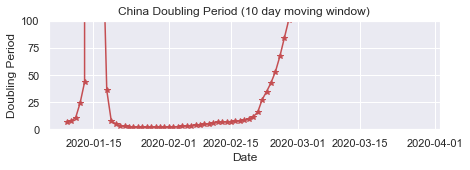

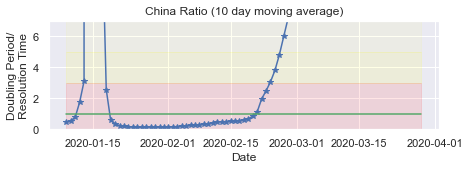

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


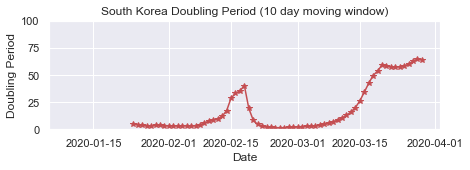

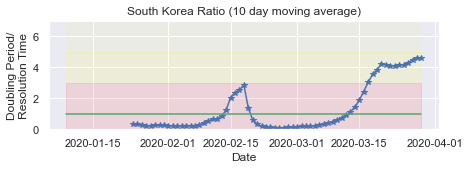

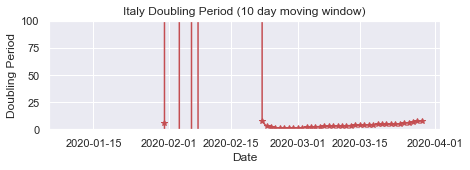

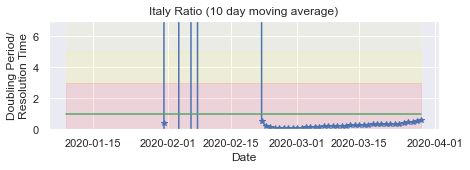

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


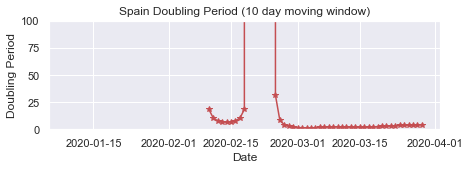

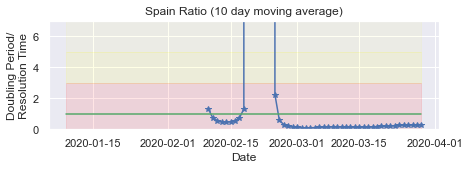

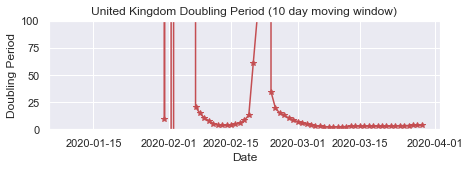

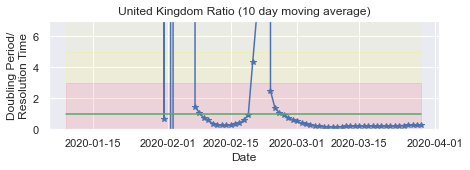

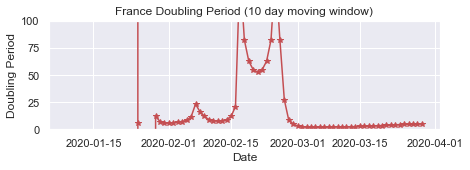

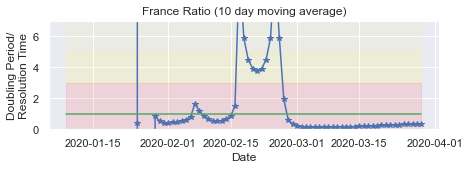

/Users/drskippy/Working/2020covid19/covid_analysis/models.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.log(.5)/m, fit_line_points


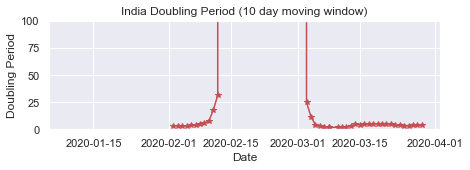

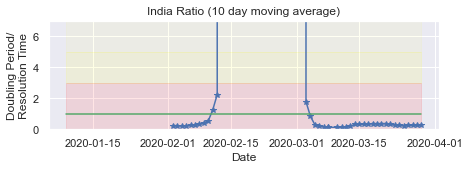

In [18]:
period_factor_plot(dfw,"CHN")
period_factor_plot(dfw,"KOR")
period_factor_plot(dfw,"ITA")
period_factor_plot(dfw,"ESP")
period_factor_plot(dfw,"GBR")
period_factor_plot(dfw,"FRA")
period_factor_plot(dfw,"IND")

### Rolling Doubling Period States

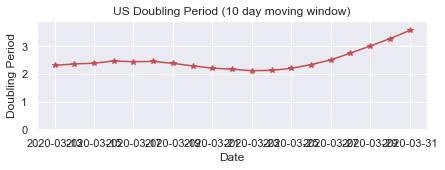

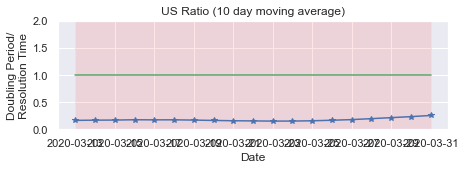

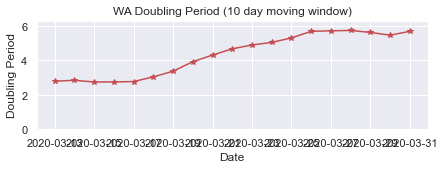

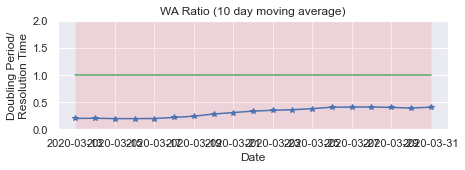

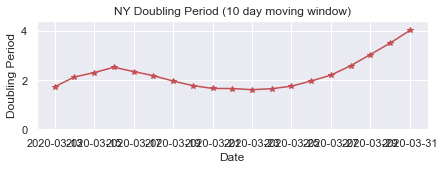

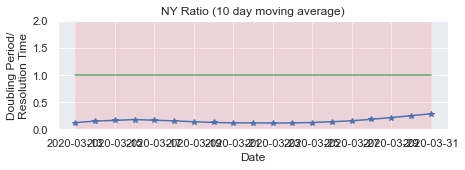

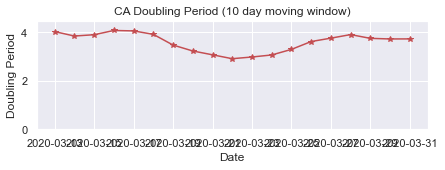

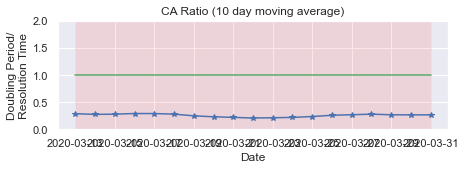

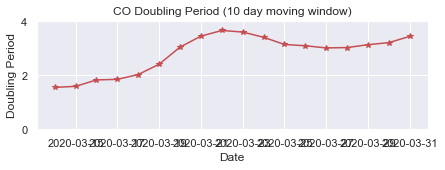

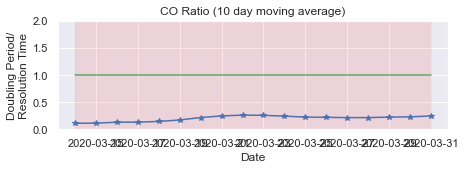

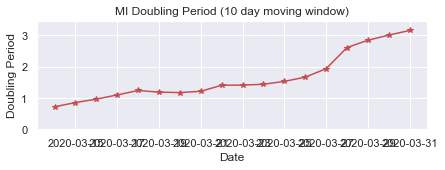

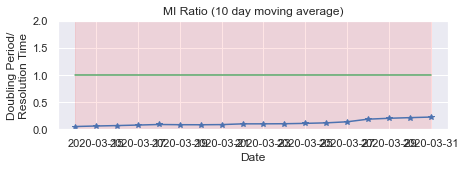

In [19]:
dfw, _ = get_state_df(df, "*")
period_factor_plot(dfw,"*", ylimit=2)
dfw, _ = get_state_df(df, "WA")
period_factor_plot(dfw,"WA", ylimit=2)
dfw, _ = get_state_df(df, "NY")
period_factor_plot(dfw,"NY", ylimit=2)
dfw, _ = get_state_df(df, "CA")
period_factor_plot(dfw,"CA", ylimit=2)
dfw, _ = get_state_df(df, "CO")
period_factor_plot(dfw,"CO", ylimit=2)
dfw, _ = get_state_df(df, "MI")
period_factor_plot(dfw,"MI", ylimit=2)

### Big Grid of Daily Total Cases by State

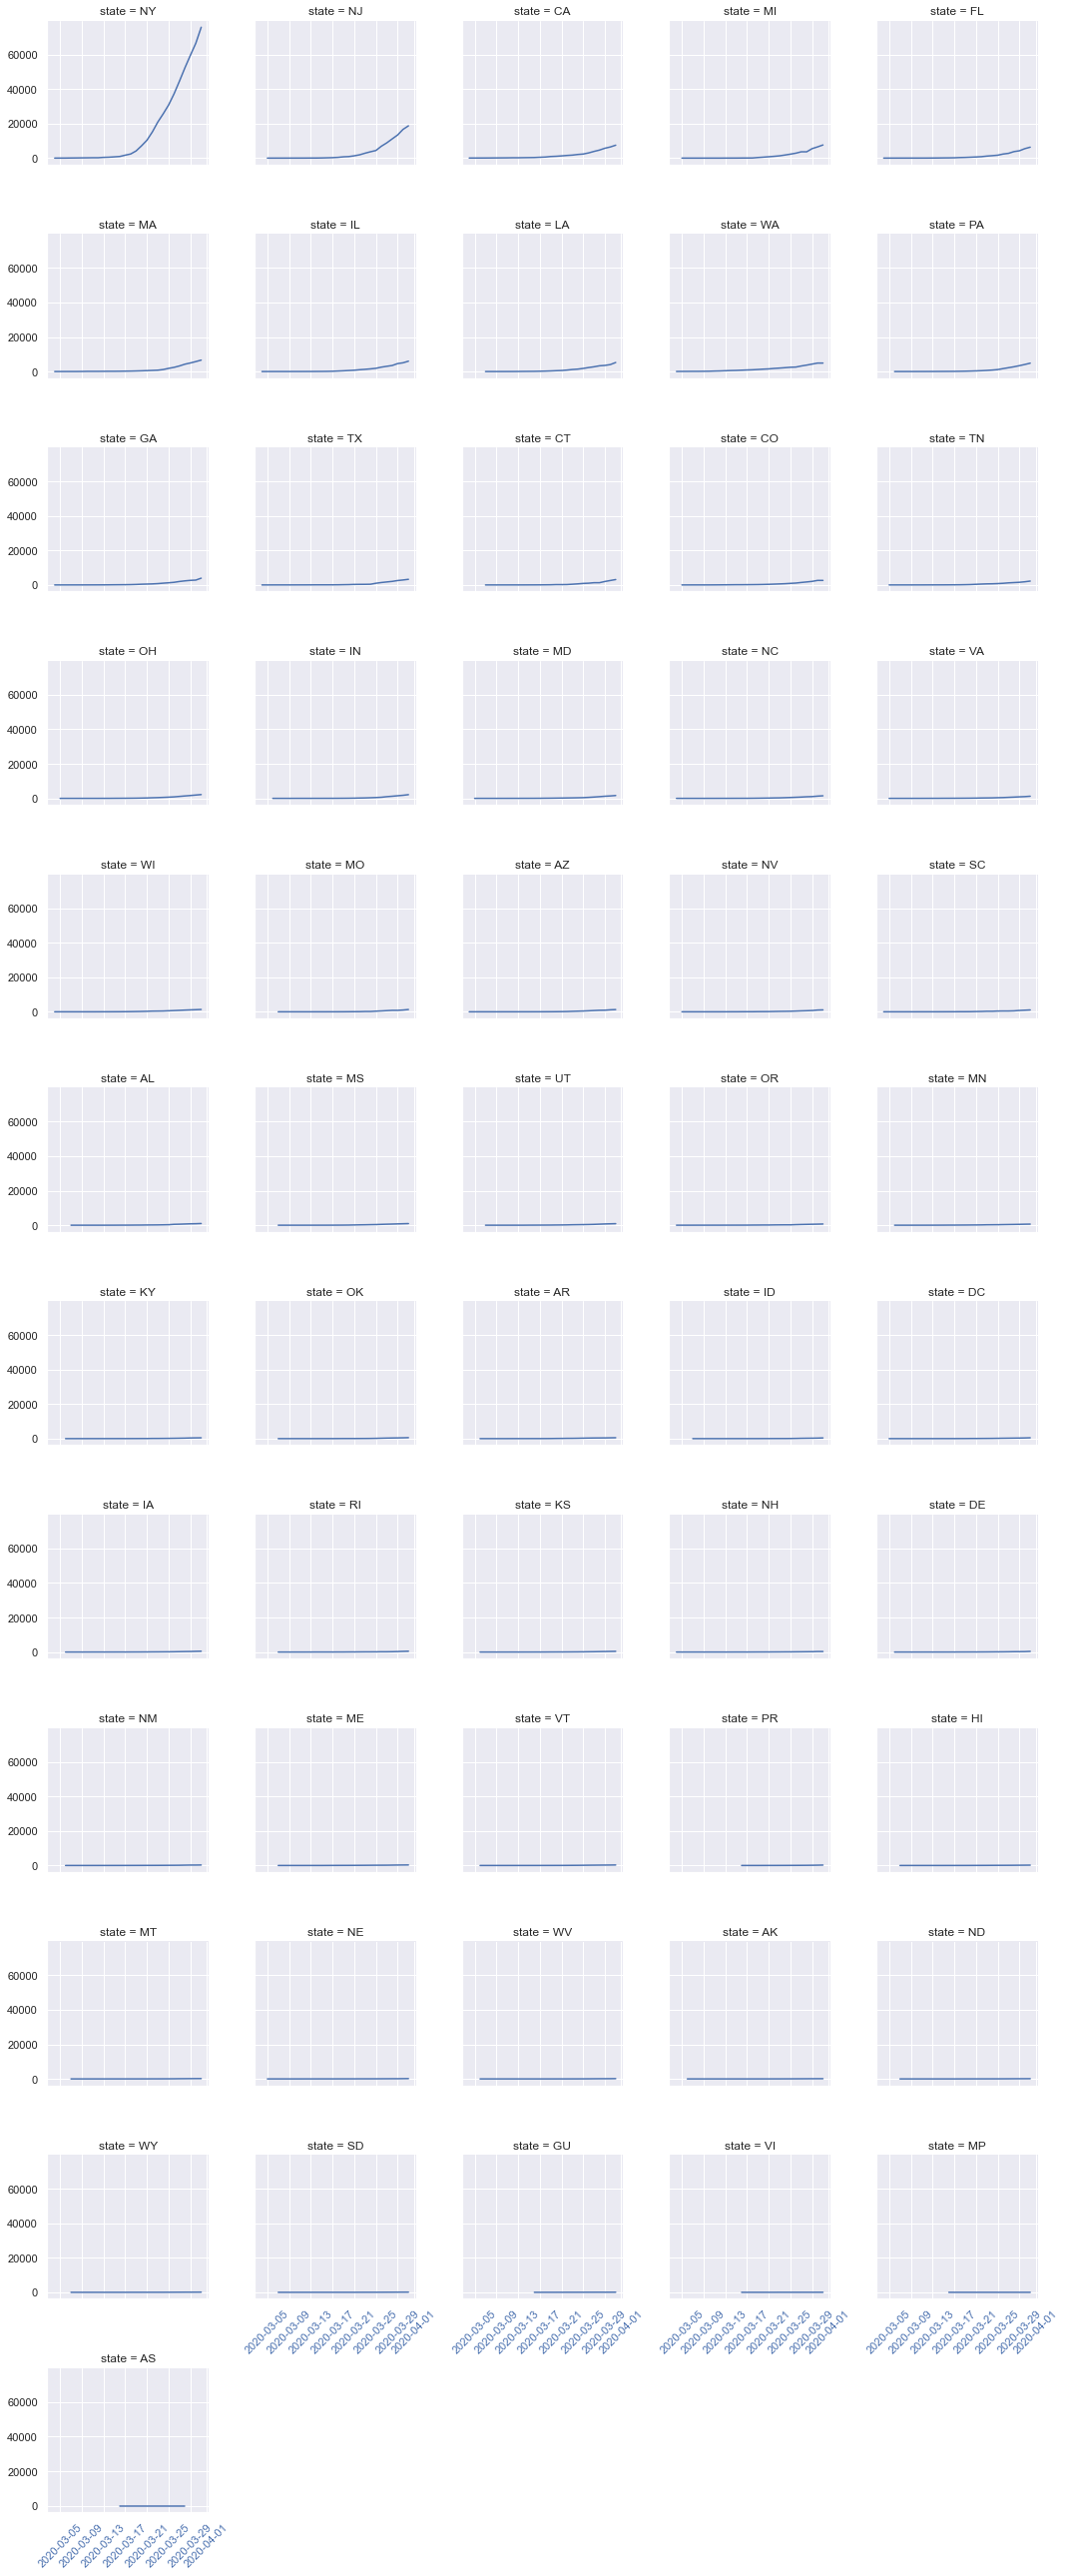

In [20]:
g = sns.FacetGrid(df, col="state", col_wrap=5, height=3, margin_titles=True)
g.map(plt.plot,"date","positive",color="b")
g.map(plt.xticks, rotation=45)